In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.style.use('seaborn-bright')

### New Datasets (August 2021)

#### PEo TV Channels Mapped with Packages

In [3]:
peo_channel_map_df = pd.read_excel("data/aug/PeoTV_Channels_Mapped_to_Packages.xlsx") 

In [4]:
peo_channel_map_df = peo_channel_map_df.iloc[3:,2:]

In [5]:
peo_channel_map_df.columns = peo_channel_map_df.iloc[0,:]

In [6]:
peo_channel_map_df.dropna(axis=0, how="all",inplace=True)

In [7]:
peo_channel_map_df = peo_channel_map_df.iloc[1:,:]

In [8]:
arr = peo_channel_map_df.columns.to_list()
arr[0] = "Channel"
arr[1] = "Language"
peo_channel_map_df.columns = arr

In [9]:
peo_channel_map_df = peo_channel_map_df.T

In [10]:
peo_channel_map_df.columns = peo_channel_map_df.iloc[0,:]

In [11]:
peo_channel_map_df = peo_channel_map_df.iloc[1:,:]

In [12]:
peo_channel_map_df

Channel,Event TV,Colombo Television,Life TV,UTV,ACE TV,Supreme TV,Jayamaga TV,Relax TV,Channel Eye,ETV,...,Damsathara,Da Vinci,English Club TV,Videsa 5,Videsa 6,Videsa 7,Videsa 8,Videsa 9,Videsa 10,Videsa 11
Language,-,-,-,-,-,-,-,-,English,English,...,Sinhala,English,English,Sinhala,Sinhala,Sinhala,Sinhala,Sinhala,Sinhala,Sinhala
PEO TV Unnatham,√,√,√,√,NaN,NaN,NaN,NaN,√,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEO Silver,√,√,√,√,√,√,√,√,√,√,...,√,NaN,NaN,NaN,√,√,√,√,√,√
PEO Silver Plus,√,√,√,√,√,√,√,√,√,√,...,√,NaN,NaN,NaN,√,√,√,√,√,√
PEO Family,√,√,√,√,√,√,√,√,√,√,...,√,√,√,NaN,√,√,√,√,√,√
PEO Entertainment,√,√,√,√,√,√,√,√,√,√,...,√,NaN,NaN,NaN,√,√,√,√,√,√
PEO Gold,√,√,√,√,√,√,√,√,√,√,...,√,NaN,√,NaN,√,√,√,√,√,√
PEO Platinum,√,√,√,√,√,√,√,√,√,√,...,√,NaN,√,NaN,√,√,√,√,√,√
PEO Titanium,√,√,√,√,√,√,√,√,√,√,...,√,√,√,NaN,√,√,√,√,√,√


In [13]:
def str_map(col):
    if isinstance(col, float):
        return 0
    elif  "√" in col:
        return 1
    else:
        return col

In [14]:
for col in peo_channel_map_df.columns.to_list():
    peo_channel_map_df[col] = peo_channel_map_df[col].apply(lambda x: str_map(x))

In [15]:
peo_channel_map_df

Channel,Event TV,Colombo Television,Life TV,UTV,ACE TV,Supreme TV,Jayamaga TV,Relax TV,Channel Eye,ETV,...,Damsathara,Da Vinci,English Club TV,Videsa 5,Videsa 6,Videsa 7,Videsa 8,Videsa 9,Videsa 10,Videsa 11
Language,-,-,-,-,-,-,-,-,English,English,...,Sinhala,English,English,Sinhala,Sinhala,Sinhala,Sinhala,Sinhala,Sinhala,Sinhala
PEO TV Unnatham,1,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
PEO Silver,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
PEO Silver Plus,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
PEO Family,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
PEO Entertainment,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
PEO Gold,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
PEO Platinum,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
PEO Titanium,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [16]:
peo_channel_map_df.to_csv("data/product_catalog/PeoTV_Package_Channel_Map_Transposed.csv")

## Product Details - Categories, Play types

In [227]:
product_cat_df = pd.read_excel("data/new/Product_details_from_BSS.xls")  

In [228]:
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60708 entries, 0 to 60707
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PRODUCT_LABEL.hash  60708 non-null  object        
 1   CUSTOMER_REF.hash   60708 non-null  object        
 2   ACCOUNT_NUM.hash    60708 non-null  object        
 3   PRODUCT_SEQ         60708 non-null  int64         
 4   START_DAT           60707 non-null  datetime64[ns]
 5   END_DAT             3292 non-null   datetime64[ns]
 6   PRODUCT_ID.hash     60708 non-null  object        
 7   PRODUCT_NAME        60707 non-null  object        
 8   PRODUCT_STATUS      60707 non-null  object        
 9   MEDIUM              60684 non-null  object        
 10  CATEGORY            60273 non-null  object        
 11  CATEGORY_DETAILS    60273 non-null  object        
 12  TARIFF_ID.hash      60708 non-null  object        
 13  TARIFF_NAME         60707 non-null  object    

### Exporting Product Category Type

In [19]:
pcat_df = product_cat_df[["PRODUCT_NAME","MEDIUM","CATEGORY","CATEGORY_DETAILS","TARIFF_ID.hash","TARIFF_NAME","TARIFF_DESC"]]

In [20]:
pcat_df.drop_duplicates("PRODUCT_NAME", inplace=True)

<ipython-input-20-9a5e87b2c85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcat_df.drop_duplicates("PRODUCT_NAME", inplace=True)


In [21]:
pcat_df.reset_index(inplace=True)

In [22]:
pcat_df.drop(["index"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
pcat_df.to_csv("data/product_catalog/Product_Info_With_Category.csv")

In [24]:
products_df = product_cat_df[["PRODUCT_ID.hash","PRODUCT_NAME","MEDIUM","CATEGORY","CATEGORY_DETAILS","TARIFF_ID.hash","TARIFF_NAME","TARIFF_DESC","RECURRING_CHARGE"]]

In [25]:
products_df.drop_duplicates(["PRODUCT_ID.hash"],inplace=True, keep="last")

<ipython-input-25-73a796203387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df.drop_duplicates(["PRODUCT_ID.hash"],inplace=True, keep="last")


In [26]:
products_df.rename(columns = {"RECURRING_CHARGE":"Monthly_Rental"},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [27]:
products_df.reset_index(inplace=True)
products_df.drop(["index"],axis=1,inplace=True)

In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUCT_ID.hash   23 non-null     object 
 1   PRODUCT_NAME      22 non-null     object 
 2   MEDIUM            19 non-null     object 
 3   CATEGORY          17 non-null     object 
 4   CATEGORY_DETAILS  17 non-null     object 
 5   TARIFF_ID.hash    23 non-null     object 
 6   TARIFF_NAME       22 non-null     object 
 7   TARIFF_DESC       22 non-null     object 
 8   Monthly_Rental    10 non-null     float64
dtypes: float64(1), object(8)
memory usage: 1.7+ KB


In [29]:
products_df["PRODUCT_NAME"].unique()

array([nan, 'V-Plus4_TeleLife', 'V_E-channeling Subscription',
       'V-Basic2_TeleLife', 'V-Basic4_TeleLife', 'V-Basic1_TeleLife',
       'V_Sisu Connect', 'V_Telehealth', 'V-Plus1_TeleLife',
       'V_E-channeling Registration', 'BB_ Entertainment Unlimited',
       'OTT_SLT PeoTV Go', 'AB_WireLess Access',
       'BB_SLT Film Hall Service', 'BB_Detailed Reports ',
       'AB_Fiber Access Bearer', 'BB_PeoTVGO', 'BB_Extra GB',
       'BB_SLT BroadBand Service', 'BB_Personal Storage',
       'E_SLT PeoTV Service', 'V_SLT Voice Service',
       'AB_Copper Access Bearer'], dtype=object)

In [30]:
products_df.to_csv("data/product_catalog/Product_info_from_BSS.csv")

## Phone No Account No Customer Reference Map

In [31]:
acc_no_map = product_cat_df[["PRODUCT_LABEL.hash","ACCOUNT_NUM.hash","CUSTOMER_REF.hash"]]
acc_no_map.drop_duplicates(["PRODUCT_LABEL.hash"],inplace=True)
acc_no_map.rename(columns={'PRODUCT_LABEL.hash':'event_source.hash'}, inplace=True)
acc_no_map.reset_index(inplace=True)
acc_no_map.drop(["index"],axis=1,inplace=True)
acc_no_map

<ipython-input-31-cb3c55b3a8c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_no_map.drop_duplicates(["PRODUCT_LABEL.hash"],inplace=True)


,event_source.hash,ACCOUNT_NUM.hash,CUSTOMER_REF.hash
0,7b40c1d1c84c9a340004769491af7931,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f
1,15799aa2e9dcf19b945e3dbe3146f7dc,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
2,a74c72a07e26ac631688df66f691255c,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
3,d67702262368f632f7014f1bd12d5444,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
4,53098ea32fbe12338600872be6e06fb0,4c7a4769273c7a2eb4860a09f6376a70,b30293458c6565bc283bac15b92aa38d
...,...,...,...
27550,28938db617a935e0f092ae16667c9f37,06623c7ba64331f615ff83c5664b71bb,ac995f79a7164b89de084396352b343b
27551,d7515b0ed8141e075023da5947b714bf,06623c7ba64331f615ff83c5664b71bb,ac995f79a7164b89de084396352b343b
27552,919ba5f18ce708afcd4f545150021b0e,bd0cc5e96b24df6625fc68cbaf71b555,df4bc5da4eaaaab1d937c3fd2a699c3f
27553,7ae240b62cca05b9ab0af678122e7e5c,8d8472d39b270801553f2d5e7c06fe22,f8743da5d0bff84f9440fb44fce1bdc1


In [32]:
acc_no_map_agg = acc_no_map.groupby("ACCOUNT_NUM.hash").agg(list)

In [33]:
acc_no_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  27555 non-null  object
 1   ACCOUNT_NUM.hash   27555 non-null  object
 2   CUSTOMER_REF.hash  27555 non-null  object
dtypes: object(3)
memory usage: 645.9+ KB


In [34]:
acc_no_map_agg.reset_index(inplace=True)

In [35]:
acc_no_map_agg

,ACCOUNT_NUM.hash,event_source.hash,CUSTOMER_REF.hash
0,00092e2fa75ca865f5ffd62247031136,[14ed29d656a0fe7ded266f219919e8ed],[c72603b21fd298f6ccaf959e638e39aa]
1,0009e7e4d940c2a539b89342af07e7f1,[5e411c13c17e851e8cdf6fbdcc10537a],[56c79821ed59179836dd2a5d75a6fec6]
2,00126426420cdb4b1fe951ce5bb3c05a,"[b35be8dc64bf972ce4b96292f16577b5, 05f14ffb738...","[a4481ed55c6f0a00c26bdafc171a34ea, a4481ed55c6..."
3,006ff446f4e8c78e943f8ea7ee9f7388,[07eb568fb2c5969b4628bbbe85d2ab0a],[65e56807580afcb5b825397daedd69df]
4,007229a6cde9f7dd9ca6ba53a03ac64e,[ac6a525918428b9d65e9a187c0ec557c],[e5b229226940485ee99e0d7ae012812a]
...,...,...,...
3213,ffc751bb5812fb7f262917605876f78a,"[c1f73b57eca12e75a982320192405a08, 50ce164efcc...","[8f0263d42ae58bbe7525ed851a0e7443, 8f0263d42ae..."
3214,ffd0d9095e89de491cc167154e1d1721,[d3439750c4842a755ebfddc64a0b42ae],[833a2caa62246ce70dd242087c5216d1]
3215,ffd820977e139cbabf31dbeb5dcc1b23,"[2cb28e3a72195bfb59107c47957f06c1, 58ce830566e...","[42ee983c47d9a0b5da431b2c0aefb1de, 42ee983c47d..."
3216,ffdc36d4cc1fdd9f9d3da1e7bc4cd49e,[9742f25ccaffa48fd8cc9f4b9521c86f],[cee064743f2f68f2207fa470c6b5ba82]


In [36]:
len(acc_no_map["ACCOUNT_NUM.hash"].unique())

3218

In [37]:
acc_no_map.to_csv("data/user_profile/account_no_map_all.csv")

In [38]:
acc_no_map_agg.to_csv("data/user_profile/account_no_map_agg.csv")

## Adding Phone Number col to Customer Demographics 

### Demographics Inofmation

In [40]:
demo_df = pd.read_excel("data/new/Demographic_Data.xls")  

In [41]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CUSTOMER_REF.hash  2400 non-null   object
 1   GENDER             2400 non-null   object
 2   BIRTH_YEAR         2400 non-null   int64 
 3   AGE                2400 non-null   int64 
 4                      2400 non-null   object
dtypes: int64(2), object(3)
memory usage: 93.9+ KB


In [42]:
merged_demo = demo_df.merge(acc_no_map,how='left', on='CUSTOMER_REF.hash')
merged_demo.reset_index(inplace=True)
merged_demo.drop(["index"],axis=1, inplace=True)
merged_demo

,CUSTOMER_REF.hash,GENDER,BIRTH_YEAR,AGE,,event_source.hash,ACCOUNT_NUM.hash
0,a043dbaaa0025b1f8cc08824dc994a0d,M,1967,54,,a84f463df0fb45ec8d42ca92ab237156,a9c24ac1c87f8677a4dbe304c88054aa
1,a043dbaaa0025b1f8cc08824dc994a0d,M,1967,54,,174913a52c17beb0dad243cec5940c30,a9c24ac1c87f8677a4dbe304c88054aa
2,2e5e5c967af4b7b4c0cf0b9185d5ad7e,M,1964,57,,0bd313cd37f37a651cc0bda8feadc630,ee3713acf4da68cda726f61d3f1026f7
3,2e5e5c967af4b7b4c0cf0b9185d5ad7e,M,1964,57,,5b6deac8be1e07aabeb41a4158a08e71,ee3713acf4da68cda726f61d3f1026f7
4,3269bc892961919e511bdbe178fa0ac6,M,1966,55,,de4a1fdf1880db54d5176095a99ed2ab,6876df747de66cfb33ecd010dfcd68c7
...,...,...,...,...,...,...,...
4114,205b0fead79db9bf08a98002d2727ef5,M,1967,54,,8187113efb884778725f953c751ae4f1,87cd775edc9cfc4f401e6ff39f239833
4115,cd035ec55e44eea43d998addc7bcc434,M,1948,73,,90feabe2f2846cbf4eb77db650c48a1b,9c926ad1c6705e1f46462dc5b59d8feb
4116,f5fbbc6264cd75823c8f8cb0830cba45,F,1949,72,,7e2f7cef44ccac863691ec25019df475,ffaaa3f5d45ce8c8553efbcfa7e6ce00
4117,f5fbbc6264cd75823c8f8cb0830cba45,F,1949,72,,2324aebced3f63304a107e6e13c39f78,ffaaa3f5d45ce8c8553efbcfa7e6ce00


In [43]:
merged_demo = merged_demo[["event_source.hash","CUSTOMER_REF.hash","ACCOUNT_NUM.hash","GENDER","BIRTH_YEAR","AGE"]]

In [44]:
merged_demo.drop_duplicates("ACCOUNT_NUM.hash",  inplace=True, keep="last")

<ipython-input-44-fd320b583848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_demo.drop_duplicates("ACCOUNT_NUM.hash",  inplace=True, keep="last")


In [45]:
merged_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2439 entries, 1 to 4118
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  2438 non-null   object
 1   CUSTOMER_REF.hash  2439 non-null   object
 2   ACCOUNT_NUM.hash   2438 non-null   object
 3   GENDER             2439 non-null   object
 4   BIRTH_YEAR         2439 non-null   int64 
 5   AGE                2439 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 133.4+ KB


In [46]:
merged_demo.to_csv("data/user_profile/user_demographics_final.csv")

## VAS Common Dataset Analysis

In [47]:
vas_common_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_Rental.xls")
vas_common_df.rename(columns={'PRODUCT_NAME':'VAS','BSS_DSP':'Month_Subscribed','RENTAL':'Rental'}, inplace=True)

In [48]:
vas_common_df

,ACCOUNT_NUM.hash,VAS,Rental,Month_Subscribed,
0,e112d7496d586689517a4e45b5f2fedf,V_Telehealth,100,2019-10-02 00:00:00,
1,8211688ed551c3ae41cd251ec79a7590,V_Telehealth,100,2019-10-02 00:00:00,
2,0febcc112d2da8fb15ae29af3e6b07e8,V_Telehealth,100,2020-02-11 00:00:00,
3,646a136484b965c0b4a1b18dfbb2c663,V_Telehealth,100,2020-02-10 00:00:00,
4,49e3fe21450d5993d23121d53942ab3b,V_Telehealth,100,2020-02-11 00:00:00,
...,...,...,...,...,...
31543,cf8dc52e654c98c2461291893eb27c06,V_Telehealth,100,2020-08-31 00:00:00,
31544,720d67e1d56b076413efbd52553c5388,V_Telehealth,165,2020-08-31 00:00:00,
31545,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,500,2021-04-25 11:52:36,
31546,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,500,2021-04-25 11:51:08,


In [49]:
# Date correction
def date_correct_common(date):
    date=str(date)
    year=date[:4]
    month=date[5:7]
    return f"{year}-{month}"

In [50]:
vas_common_df["Month_Subscribed"]=vas_common_df["Month_Subscribed"].apply(lambda x: date_correct_common(x))

In [51]:
vas_common_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31548 entries, 0 to 31547
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  31548 non-null  object
 1   VAS               31548 non-null  object
 2   Rental            31548 non-null  object
 3   Month_Subscribed  31548 non-null  object
 4                     31548 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [52]:
vas_common_df

,ACCOUNT_NUM.hash,VAS,Rental,Month_Subscribed,
0,e112d7496d586689517a4e45b5f2fedf,V_Telehealth,100,2019-10,
1,8211688ed551c3ae41cd251ec79a7590,V_Telehealth,100,2019-10,
2,0febcc112d2da8fb15ae29af3e6b07e8,V_Telehealth,100,2020-02,
3,646a136484b965c0b4a1b18dfbb2c663,V_Telehealth,100,2020-02,
4,49e3fe21450d5993d23121d53942ab3b,V_Telehealth,100,2020-02,
...,...,...,...,...,...
31543,cf8dc52e654c98c2461291893eb27c06,V_Telehealth,100,2020-08,
31544,720d67e1d56b076413efbd52553c5388,V_Telehealth,165,2020-08,
31545,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,500,2021-04,
31546,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,500,2021-04,


In [53]:
#vas_common_df = vas_common_df.merge(acc_no_map_agg,how='left',on="ACCOUNT_NUM.hash")

In [54]:
vas_common_df = vas_common_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]
vas_common_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,e112d7496d586689517a4e45b5f2fedf,V_Telehealth,2019-10,100
1,8211688ed551c3ae41cd251ec79a7590,V_Telehealth,2019-10,100
2,0febcc112d2da8fb15ae29af3e6b07e8,V_Telehealth,2020-02,100
3,646a136484b965c0b4a1b18dfbb2c663,V_Telehealth,2020-02,100
4,49e3fe21450d5993d23121d53942ab3b,V_Telehealth,2020-02,100
...,...,...,...,...
31543,cf8dc52e654c98c2461291893eb27c06,V_Telehealth,2020-08,100
31544,720d67e1d56b076413efbd52553c5388,V_Telehealth,2020-08,165
31545,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,2021-04,500
31546,8e7a582787f663d030bd2dc31e46ee49,FTTH_Gamer Lite Subscription,2021-04,500


In [55]:
len(vas_common_df["ACCOUNT_NUM.hash"].unique())

30016

In [56]:
vas_common_df["VAS"].value_counts()

V_Telehealth                        30569
P-Basic1_Tele Life                    266
P-Plus1_Tele Life                     149
V-Basic1_TeleLife                     135
V-Plus1_TeleLife                      113
P_Sisu Connect                        107
V_Sisu Connect                         74
BB_YouTube Bundle                      59
BB_Messenger Bundle                    28
BB_ Entertainment Unlimited            22
P-Plus4_Tele Life                       5
V-Plus4_TeleLife                        4
C_Sisu Connect                          4
P-Basic2_Tele Life                      3
FTTH_Gamer Lite Subscription            2
C-Basic1_Tele Life                      2
V-Basic2_TeleLife                       2
V-Basic4_TeleLife                       1
Megaline_Gamer Lite Subscription        1
2462                                    1
P-Basic4_Tele Life                      1
Name: VAS, dtype: int64

## VAS Analysis from Product BSS dataset

In [57]:
product_cat_df["PRODUCT_NAME"].unique()

array(['AB_Copper Access Bearer', 'V_SLT Voice Service',
       'E_SLT PeoTV Service', 'V_E-channeling Registration',
       'V_Sisu Connect', 'V-Basic1_TeleLife', 'V_Telehealth',
       'V-Plus1_TeleLife', 'V_E-channeling Subscription', nan,
       'V-Plus4_TeleLife', 'OTT_SLT PeoTV Go', 'V-Basic2_TeleLife',
       'V-Basic4_TeleLife', 'BB_PeoTVGO', 'BB_Personal Storage',
       'BB_SLT BroadBand Service', 'BB_Extra GB', 'BB_Detailed Reports ',
       'BB_ Entertainment Unlimited', 'BB_SLT Film Hall Service',
       'AB_Fiber Access Bearer', 'AB_WireLess Access'], dtype=object)

In [58]:
dss_vas_df =  product_cat_df[["ACCOUNT_NUM.hash","PRODUCT_NAME","START_DAT","RECURRING_CHARGE"]]

In [59]:
dss_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60708 entries, 0 to 60707
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ACCOUNT_NUM.hash  60708 non-null  object        
 1   PRODUCT_NAME      60707 non-null  object        
 2   START_DAT         60707 non-null  datetime64[ns]
 3   RECURRING_CHARGE  8386 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.9+ MB


In [60]:
dss_vas_df.sort_values(['ACCOUNT_NUM.hash', 'START_DAT'], ascending=[True, True], inplace=True)

<ipython-input-60-814cd12b6528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dss_vas_df.sort_values(['ACCOUNT_NUM.hash', 'START_DAT'], ascending=[True, True], inplace=True)


In [61]:
dss_vas_df.rename(columns={'PRODUCT_NAME':'VAS','START_DAT':'Month_Subscribed',"RECURRING_CHARGE":"Rental"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Exporting Extra GB usage

In [62]:
extra_GB_dss_df = dss_vas_df[(dss_vas_df["VAS"]=="BB_Extra GB")]

In [63]:
extra_GB_dss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 57403 to 49321
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ACCOUNT_NUM.hash  5372 non-null   object        
 1   VAS               5372 non-null   object        
 2   Month_Subscribed  5372 non-null   datetime64[ns]
 3   Rental            0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 209.8+ KB


In [64]:
extra_GB_dss_df["VAS"].value_counts()

BB_Extra GB    5372
Name: VAS, dtype: int64

In [65]:
extra_GB_dss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 57403 to 49321
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ACCOUNT_NUM.hash  5372 non-null   object        
 1   VAS               5372 non-null   object        
 2   Month_Subscribed  5372 non-null   datetime64[ns]
 3   Rental            0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 209.8+ KB


In [66]:
len(extra_GB_dss_df["ACCOUNT_NUM.hash"].unique())

1469

In [67]:
dss_vas_df = dss_vas_df[(dss_vas_df["VAS"]!="BB_Extra GB")]

In [68]:
#dss_vas_df.drop_duplicates(["event_source.hash"],inplace=True,keep="last")

In [69]:
# Date correction
def date_correct_dss(date):
    if len(date)>7:
        return date[:7]
    else:
        return date

In [70]:
dss_vas_df["Month_Subscribed"]=dss_vas_df["Month_Subscribed"].apply(lambda x: date_correct_dss(str(x)))

In [71]:
dss_vas_df["Month_Subscribed"].unique()

array(['2020-07', '2018-08', '2018-12', '2020-03', '2019-10', '2018-11',
       '2018-10', '2017-01', '2019-04', '2018-09', '2019-01', '2019-02',
       '2019-03', '2019-05', '2019-06', '2019-11', '2019-12', '2020-01',
       '2020-02', '2020-04', '2020-06', '2020-08', '2014-01', '2014-03',
       '2015-02', '2015-07', '2015-11', '2016-02', '2016-08', '2016-10',
       '2017-02', '2017-03', '2017-11', '2018-01', '2018-02', '2018-04',
       '2019-07', '2019-08', '2019-09', '2020-05', '2021-03', '2018-05',
       '2018-07', '2015-09', '2016-11', '2017-06', '2018-03', '2016-05',
       '2016-09', '2017-04', '2017-09', '2017-12', '2018-06', '2020-09',
       '2016-06', '2015-08', '2016-04', '2017-07', '2017-08', '2017-10',
       '2021-02', '2014-02', '2015-10', '2016-12', '2016-01', '2017-05',
       '2020-10', 'NaT', '2015-05', '2016-07', '2016-03'], dtype=object)

In [72]:
dss_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55336 entries, 26825 to 33575
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  55336 non-null  object 
 1   VAS               55335 non-null  object 
 2   Month_Subscribed  55336 non-null  object 
 3   Rental            8386 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [73]:
dss_vas_df["VAS"].value_counts()

V_SLT Voice Service            18847
AB_Copper Access Bearer        17637
BB_SLT BroadBand Service        5400
BB_PeoTVGO                      4800
BB_Personal Storage             4368
E_SLT PeoTV Service             2385
AB_WireLess Access              1076
AB_Fiber Access Bearer           327
V-Basic1_TeleLife                 99
V-Plus1_TeleLife                  87
BB_Detailed Reports               84
V_E-channeling Registration       80
V_Telehealth                      58
V_Sisu Connect                    36
V_E-channeling Subscription       30
BB_SLT Film Hall Service           9
OTT_SLT PeoTV Go                   4
V-Plus4_TeleLife                   3
V-Basic2_TeleLife                  2
BB_ Entertainment Unlimited        2
V-Basic4_TeleLife                  1
Name: VAS, dtype: int64

## VAS OTC Dataset Analysis

In [74]:
vas_otc_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_OTC.xls")  
vas_otc_df.rename(columns={'CREATED_DTM':'Month_Subscribed','OTC_MNY':'One_Time_Charge','OTC_NAME':'VAS'}, inplace=True)

In [75]:
vas_otc_df["Month_Subscribed"]=vas_otc_df["Month_Subscribed"].apply(lambda x: date_correct_common(x))

In [76]:
vas_otc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  1547 non-null   object
 1   Month_Subscribed  1547 non-null   object
 2   One_Time_Charge   1547 non-null   int64 
 3   VAS               1547 non-null   object
 4                     1547 non-null   object
dtypes: int64(1), object(4)
memory usage: 60.6+ KB


In [77]:
#vas_otc_df = vas_otc_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")

In [78]:
vas_otc_df = vas_otc_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","One_Time_Charge"]]
vas_otc_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed,One_Time_Charge
0,7a4e5798abc9c9e314e4c6367da7e558,Meet Lite,2021-05,195
1,02059e815d999bda708149ae263946d3,Meet Lite,2021-06,195
2,83b2f83faba76ed481f026be3197caaa,Meet Lite,2021-06,195
3,a3434e3a611ba69b233514072ad2eb79,Meet Lite,2021-04,195
4,a3434e3a611ba69b233514072ad2eb79,Meet Lite,2021-05,195
...,...,...,...,...
1542,5ac9d5e02406067f6cc31d5436a5a8fb,Meet Lite,2021-04,195
1543,4f1ed566c9476815cfe56eab1c22ed05,Meet Lite,2021-06,195
1544,4cf83d8277f8c1cd95199a342092e808,Meet Max,2020-10,490
1545,4cf83d8277f8c1cd95199a342092e808,Meet Max,2020-12,490


In [79]:
vas_otc_df["VAS"].value_counts()

Meet Lite    1374
Meet Max      164
Edu Lite        9
Name: VAS, dtype: int64

## BB VAS Dataset Analysis

In [80]:
vas_purchase_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_Costed_Events.xls")  
vas_purchase_df.rename(columns={'MM/YYYY':'Month_Subscribed','REV':'Rental','PRODUCT':'VAS'}, inplace=True)

In [81]:
vas_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2977 entries, 0 to 2976
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  2977 non-null   object 
 1   Month_Subscribed  2977 non-null   object 
 2   Rental            2977 non-null   float64
 3   VAS               2977 non-null   object 
 4                     2977 non-null   object 
dtypes: float64(1), object(4)
memory usage: 116.4+ KB


In [82]:
# Date correction
def date_correct_bb(date):
    if len(date)==5:
        month = "0" + date[0]
        year = date[1:]
    if len(date)==6:
        month=date[:2]
        year=date[2:]
    if len(date)>6:
        year=date[:4]
        month=date[9:11]
    return f"{year}-{month}"

In [83]:
# test
print(date_correct_bb("32020"))
print(date_correct_bb("102017"))
print(date_correct_bb("2021-May-02 08:02:23"))

2020-03
2017-10
2021-02


In [84]:
vas_purchase_df["Month_Subscribed"]=vas_purchase_df["Month_Subscribed"].apply(lambda x: date_correct_bb(x))

In [85]:
#vas_purchase_df = vas_purchase_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")
#vas_purchase_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS","Month_Subscribed"], inplace=True,keep="last")

In [86]:
vas_purchase_df = vas_purchase_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]

In [87]:
vas_purchase_df["VAS"].value_counts()

BB EXTRA GB                      2307
BB_Report Subscription Charge     494
BB Personal Storage               176
Name: VAS, dtype: int64

### Extra GB Usage

In [88]:
extra_GB_df= vas_purchase_df[(vas_purchase_df["VAS"]=="BB EXTRA GB")]
extra_GB_df.reset_index(inplace=True)
extra_GB_df.drop(["index"],axis=1,inplace=True)
extra_GB_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,668291ed17c638aaed94f99f7fdf33a5,BB EXTRA GB,2017-04,250.0
1,59322724d5029e5667d19ae164cdc16d,BB EXTRA GB,2018-01,750.0
2,0e1fe0d01f3a2e9619999a1a634ec427,BB EXTRA GB,2018-01,1500.0
3,0e3e3cabb8b653645ad4268f318a80b8,BB EXTRA GB,2017-08,750.0
4,130a75d8233d72dc5dce070522818bea,BB EXTRA GB,2020-06,850.0
...,...,...,...,...
2302,9b711e39affb4e5a7a364787253d4c09,BB EXTRA GB,2020-05,3000.0
2303,83b2f83faba76ed481f026be3197caaa,BB EXTRA GB,2020-03,850.0
2304,6c4e0622eabb0cd72da7dee9ac9e1996,BB EXTRA GB,2020-05,3585.0
2305,6f5a50d14f88a8bbed200d30e65ddf20,BB EXTRA GB,2020-03,3400.0


In [89]:
extra_GB_dss_df= extra_GB_dss_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]

In [90]:
# Date correction
def date_correct_dss(date):
    if len(date)>7:
        return date[:7]
    else:
        return date

In [91]:
extra_GB_dss_df["Month_Subscribed"]=extra_GB_dss_df["Month_Subscribed"].apply(lambda x: date_correct_dss(str(x)))

In [92]:
extra_GB_dss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5372 entries, 57403 to 49321
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  5372 non-null   object 
 1   VAS               5372 non-null   object 
 2   Month_Subscribed  5372 non-null   object 
 3   Rental            0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 209.8+ KB


In [93]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  2307 non-null   object 
 1   VAS               2307 non-null   object 
 2   Month_Subscribed  2307 non-null   object 
 3   Rental            2307 non-null   float64
dtypes: float64(1), object(3)
memory usage: 72.2+ KB


In [94]:
extra_GB_df = pd.concat([extra_GB_dss_df, extra_GB_df], ignore_index=True)

In [95]:
extra_GB_df["Month_Subscribed"].unique()

array(['2019-10', '2020-03', '2018-08', '2017-01', '2018-12', '2019-04',
       '2018-09', '2018-10', '2019-05', '2019-06', '2019-12', '2020-02',
       '2014-01', '2014-03', '2016-08', '2017-03', '2018-01', '2019-03',
       '2019-08', '2019-09', '2019-11', '2020-04', '2020-05', '2020-07',
       '2020-08', '2021-03', '2019-01', '2020-06', '2018-05', '2018-07',
       '2019-07', '2020-01', '2015-09', '2017-06', '2016-09', '2017-12',
       '2018-04', '2018-06', '2018-11', '2019-02', '2020-09', '2018-03',
       '2017-11', '2015-08', '2017-02', '2016-04', '2016-06', '2017-07',
       '2017-08', '2014-02', '2016-11', '2017-04', '2018-02', '2015-10',
       '2016-10', '2017-09', '2017-10', '2017-05', '2015-05', '2016-01',
       '2016-05', '2016-07', '2016-03', '2016-12', '2013-05', '2013-06',
       '2013-01', '2013-03', '2013-07', '2013-02', '2015-12', '2013-04',
       '2016-02', '2015-11'], dtype=object)

In [96]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  7679 non-null   object 
 1   VAS               7679 non-null   object 
 2   Month_Subscribed  7679 non-null   object 
 3   Rental            2307 non-null   float64
dtypes: float64(1), object(3)
memory usage: 240.1+ KB


In [97]:
len(extra_GB_df["ACCOUNT_NUM.hash"].unique())

1527

### Extra GB Usage Trend Analysis

In [98]:
bb_usage_for_plot = extra_GB_df[["ACCOUNT_NUM.hash","Month_Subscribed","Rental"]]
bb_usage_for_plot["Month_Subscribed"] = bb_usage_for_plot["Month_Subscribed"].astype("category")

<ipython-input-98-129021b27b33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_usage_for_plot["Month_Subscribed"] = bb_usage_for_plot["Month_Subscribed"].astype("category")


In [99]:
bb_summed_df = bb_usage_for_plot.groupby("Month_Subscribed").sum()

In [100]:
df_2016 = bb_summed_df.iloc[16:28,:]

In [101]:
df_2017 = bb_summed_df.iloc[28:40,:]

In [102]:
df_2018 = bb_summed_df.iloc[40:52,:]

In [103]:
df_2019 = bb_summed_df.iloc[52:64,:]

In [104]:
df_2020 = bb_summed_df.iloc[64:73,:]

Text(0.5, 0.98, 'Extra Gb Usage(Rs.) with Time')

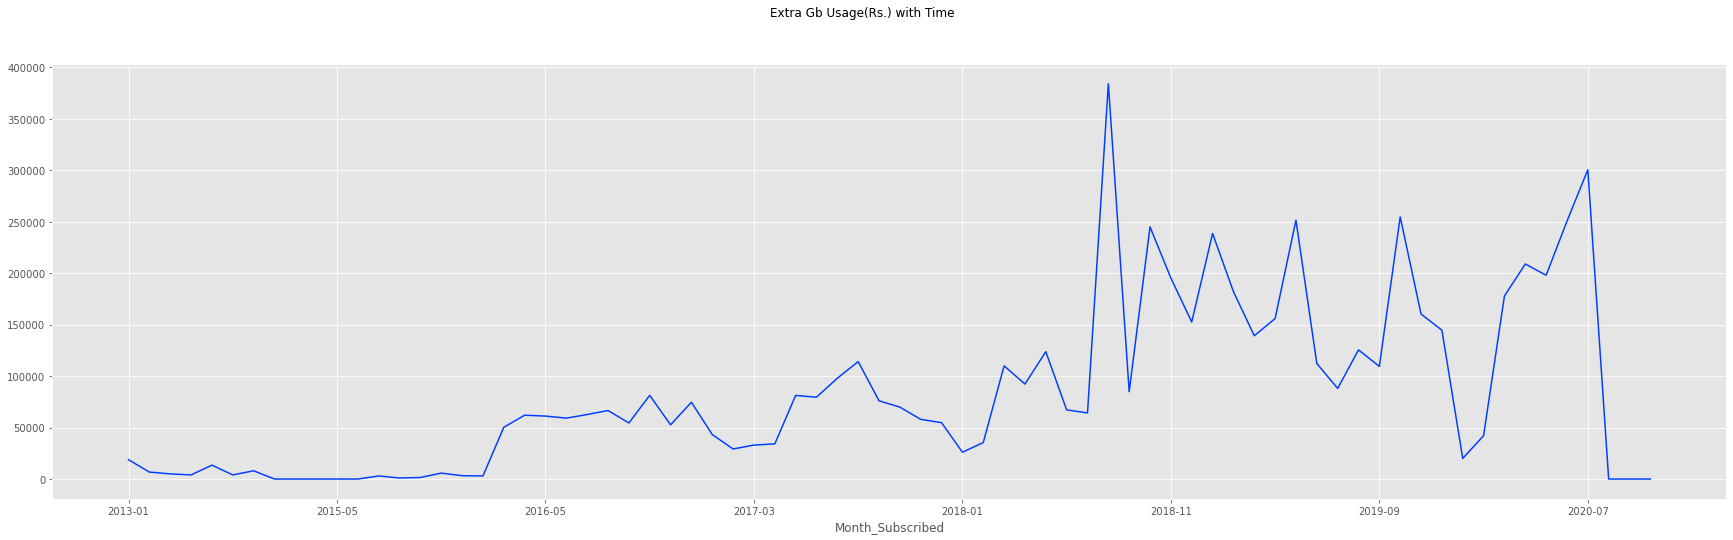

In [105]:
plt.figure(figsize=(30,8))
bb_summed_df["Rental"].plot()
plt.suptitle("Extra Gb Usage(Rs.) with Time")

Text(0.5, 1.0, 'Extra Gb Usage(Rs.) with Time')

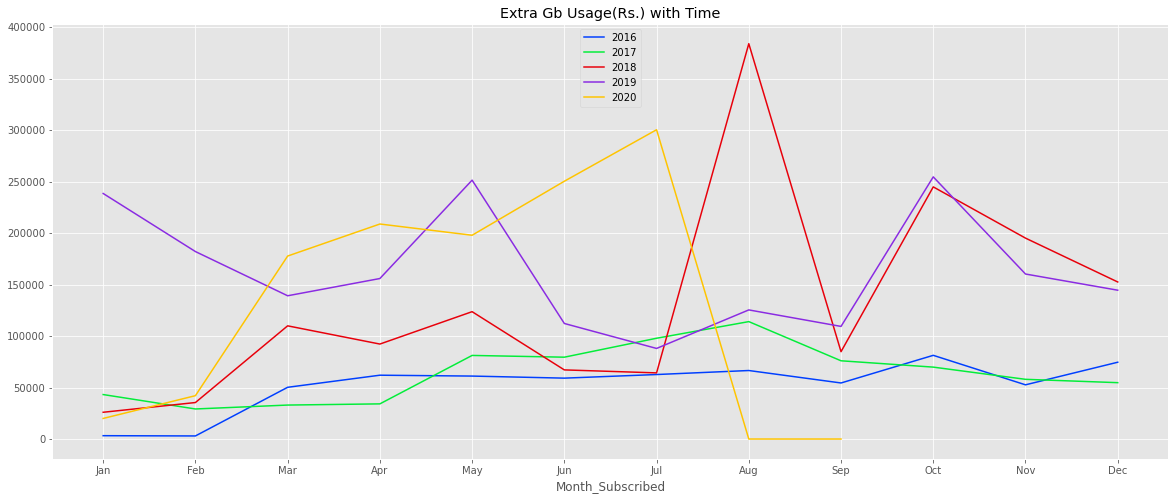

<Figure size 432x288 with 0 Axes>

In [106]:
fig, ax = plt.subplots()
plt.figure()
df_2016["Rental"].plot(ax=ax,figsize=(20,8))
df_2017["Rental"].plot(ax=ax,figsize=(20,8))
df_2018["Rental"].plot(ax=ax,figsize=(20,8))
df_2019["Rental"].plot(ax=ax,figsize=(20,8))
df_2020["Rental"].plot(ax=ax,figsize=(20,8))
ax.legend(["2016","2017","2018","2019","2020"], loc='upper center')
month_ticks=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax.set_xticks(np.arange(len(month_ticks)))
ax.set_xticklabels(month_ticks)
ax.set_title("Extra Gb Usage(Rs.) with Time")

In [107]:
extra_GB_df.to_csv("data/user_profile/BB_extra_GB_usage.csv")

#### Extra GB Usage pivot matrix

In [108]:
extra_GB_pivot_df = pd.pivot_table(extra_GB_df[["ACCOUNT_NUM.hash","Month_Subscribed","Rental"]],index=['ACCOUNT_NUM.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [109]:
extra_GB_pivot_df

Rental                                  \
Month_Subscribed                 2013-01 2013-02 2013-03 2013-04 2013-05   
ACCOUNT_NUM.hash                                                           
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0   
00126426420cdb4b1fe951ce5bb3c05a     500       0     250       0       0   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0   
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0   
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
ff419294738cd6d4259861c10653cf17       0       0       0       0       0   
ff464b58ad70d2a6064acb0c2c727337       0       0       0       0       0   
ff6a9ebde4f19c42c852aa679c877b41       0       0       0       0       0   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0   

                                                                          ...  \
Month_Subscribed                 2013-06 2013-07 2014-01 2014-02 2014-03  ...   
ACCOUNT_NUM.hash                                                          ...   
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0  ...   
00126426420cdb4b1fe951ce5bb3c05a       0       0       0       0       0  ...   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0  ...   
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0  ...   
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0  ...   
...                                  ...     ...     ...     ...     ...  ...   
ff419294738cd6d4259861c10653cf17       0       0       0       0       0  ...   
ff464b58ad70d2a6064acb0c2c727337       0       0       0       0       0  ...   
ff6a9ebde4f19c42c852aa679c877b41       0       0       0       0       0  ...   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0  ...   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0  ...   

                                                                          \
Month_Subscribed                 2020-01 2020-02 2020-03 2020-04 2020-05   
ACCOUNT_NUM.hash                                                           
0009e7e4d940c2a539b89342af07e7f1       0       0    1200       0       0   
00126426420cdb4b1fe951ce5bb3c05a       0       0       0       0       0   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0   
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0   
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
ff419294738cd6d4259861c10653cf17       0       0       0       0       0   
ff464b58ad70d2a6064acb0c2c727337       0       0       0       0       0   
ff6a9ebde4f19c42c852aa679c877b41       0       0       0    1050    1050   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0   

                                                                          
Month_Subscribed                 2020-06 2020-07 2020-08 2020-09 2021-03  
ACCOUNT_NUM.hash                                                          
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0  
00126426420cdb4b1fe951ce5bb3c05a       0       0       0       0       0  
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0  
009ef2d25878cecee8d2c8115d26f4ab       0       0       0       0       0  
0105eba65de307bc8ca366dac37aff7b       0       0       0       0       0  
...                                  ...     ...     ...     ...     ...  
ff419294738cd6d4259861c10653cf17       0       0       0       0       0  
ff464b58ad70d2a6064

In [219]:
extra_GB_pivot_df.to_csv("data/user_profile/extra_usage/BB_extra_GB_usage_pivot_extended.csv")

#### Insights
- 1527 unique customers - extra GB purchases in moths vary from 2013-2021

## Extra GB Usage with Details

In [404]:
# Note: Data From Past 6 months only
extra_GB_detailed_df = pd.read_excel("data/aug/Extra_GB_Detailed Report.xls")

In [405]:
extra_GB_detailed_df["CREATED_DTM"].unique()

array(['2021-Jun-19 01:48:05', '2021-Jun-19 19:07:15',
       '2021-Jun-20 19:35:28', ..., '2021-Feb-18 04:12:00',
       '2021-Mar-05 13:21:01', '2021-Mar-05 17:26:28'], dtype=object)

In [406]:
def remove_gb(col):
    if not isinstance(col, float):
        if "GB" in col:
            return col.replace("GB","").replace(" ","")
        else:
            return col
    else:
        return col

In [407]:
# Date correction
def hour_correct_ex_gb(hr):
    if not isinstance(hr, float):
        return hr[12:14]

In [408]:
# Date correction
month_map = {"Jan":"01", "Feb":"02", "Mar":"03", "Apr":"04", "May":"05", "Jun":"06","Jul":"07","Aug":"08","Sept":"09","Oct":"10","Nov":"11","Dec":"12"}
def month_correct_ex_gb(date):
    if not isinstance(date, float):
        for month, num in month_map.items():
            if month in date:
                return f"{date[0:4]}-{num}"

In [409]:
# test
hour_correct_ex_gb("2021-Feb-19 13:47:56")

'13'

In [410]:
#test
month_correct_ex_gb("2021-Feb-19 13:47:56")

'2021-02'

In [411]:
extra_GB_detailed_df = extra_GB_detailed_df.iloc[:,:5]

In [412]:
extra_GB_detailed_df["Month_Subscribed"] = extra_GB_detailed_df["CREATED_DTM"].apply(lambda x: month_correct_ex_gb(x))
extra_GB_detailed_df["Hour_Subscribed"] = extra_GB_detailed_df["CREATED_DTM"].apply(lambda x: hour_correct_ex_gb(x))

In [413]:
extra_GB_detailed_df.drop(["CREATED_DTM"],axis=1,inplace=True)

In [414]:
extra_GB_detailed_df.rename(columns={"EVENT_COST_MNY/1000":"Rental","REVENUE":"BB_Package"},inplace=True)

In [415]:
extra_GB_detailed_df["GB_AMOUNT"] = extra_GB_detailed_df["GB_AMOUNT"].apply(lambda x: remove_gb(x))

In [416]:
extra_GB_detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211 entries, 0 to 6210
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  6211 non-null   object
 1   Rental            6211 non-null   int64 
 2   BB_Package        6211 non-null   object
 3   GB_AMOUNT         6211 non-null   object
 4   Month_Subscribed  6211 non-null   object
 5   Hour_Subscribed   6211 non-null   object
dtypes: int64(1), object(5)
memory usage: 291.3+ KB


In [418]:
extra_GB_detailed_df.to_csv("data/user_profile/BB_Extra_GB_Usage_Detailed.csv")

#### Extra GB Detailed Pivot tables

In [155]:
extra_GB_rental_Pivot = pd.pivot_table(extra_GB_detailed_df[["ACCOUNT_NUM.hash","Month_Subscribed","Rental"]],index=['ACCOUNT_NUM.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [157]:
extra_GB_rental_Pivot

Rental                                  \
Month_Subscribed                 2019-01 2019-02 2020-11 2021-02 2021-03   
ACCOUNT_NUM.hash                                                           
0009e7e4d940c2a539b89342af07e7f1       0       0       0       0       0   
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0   
009f8579b6fcaf11bac2304a1e53fee8       0       0       0       0       0   
01d4aea4b4e156705a9ff94e699e5aa3       0       0       0       0       0   
01f29baefa8fabbd7351cc8260f56323       0       0       0    1700       0   
...                                  ...     ...     ...     ...     ...   
fc03b76767d7b230a4b5f69846dd1305       0       0       0       0       0   
fc1a1fe57837b41d1d9ad2eac3f55cf9       0       0       0     100       0   
fccd08025608a774a70885c965aa0c10       0       0       0       0     100   
ffaa8955dcd8a0af7d148c10fd447fcc       0       0       0       0       0   
ffc751bb5812fb7f262917605876f78a       0       0       0       0       0   

                                                                          
Month_Subscribed                 2021-04 2021-05 2021-06 2021-07 2021-08  
ACCOUNT_NUM.hash                                                          
0009e7e4d940c2a539b89342af07e7f1       0     300       0       0       0  
008bca99f0cccb5d07d4f03744709cf8       0       0       0       0       0  
009f8579b6fcaf11bac2304a1e53fee8       0       0       0     300       0  
01d4aea4b4e156705a9ff94e699e5aa3       0       0       0     850       0  
01f29baefa8fabbd7351cc8260f56323       0       0    2550       0       0  
...                                  ...     ...     ...     ...     ...  
fc03b76767d7b230a4b5f69846dd1305     100       0       0     100       0  
fc1a1fe57837b41d1d9ad2eac3f55cf9       0       0       0     425       0  
fccd08025608a774a70885c965aa0c10     100       0       0       0       0  
ffaa8955dcd8a0af7d148c10fd447fcc       0     400       0       0       0  
ffc751bb5812fb7f262917605876f78a       0     300       0       0       0  

[613 rows x 10 columns]

In [158]:
extra_GB_size_Pivot = pd.pivot_table(extra_GB_detailed_df[["ACCOUNT_NUM.hash","Month_Subscribed","GB_AMOUNT"]],index=['ACCOUNT_NUM.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [159]:
extra_GB_size_Pivot

GB_AMOUNT                                  \
Month_Subscribed                   2019-01 2019-02 2020-11 2021-02 2021-03   
ACCOUNT_NUM.hash                                                             
0009e7e4d940c2a539b89342af07e7f1         0       0       0       0       0   
008bca99f0cccb5d07d4f03744709cf8         0       0       0       0       0   
009f8579b6fcaf11bac2304a1e53fee8         0       0       0       0       0   
01d4aea4b4e156705a9ff94e699e5aa3         0       0       0       0       0   
01f29baefa8fabbd7351cc8260f56323         0       0       0    1010       0   
...                                    ...     ...     ...     ...     ...   
fc03b76767d7b230a4b5f69846dd1305         0       0       0       0       0   
fc1a1fe57837b41d1d9ad2eac3f55cf9         0       0       0       1       0   
fccd08025608a774a70885c965aa0c10         0       0       0       0       1   
ffaa8955dcd8a0af7d148c10fd447fcc         0       0       0       0       0   
ffc751bb5812fb7f262917605876f78a         0       0       0       0       0   

                                                                          
Month_Subscribed                 2021-04 2021-05 2021-06 2021-07 2021-08  
ACCOUNT_NUM.hash                                                          
0009e7e4d940c2a539b89342af07e7f1       0       3       0       0       0  
008bca99f0cccb5d07d4f03744709cf8       5       0       0       0       0  
009f8579b6fcaf11bac2304a1e53fee8       0       0       0     111       0  
01d4aea4b4e156705a9ff94e699e5aa3       0       0       0      55       0  
01f29baefa8fabbd7351cc8260f56323       0       0  510555       0       0  
...                                  ...     ...     ...     ...     ...  
fc03b76767d7b230a4b5f69846dd1305       1       0       0       1       0  
fc1a1fe57837b41d1d9ad2eac3f55cf9       0       0       0       5       0  
fccd08025608a774a70885c965aa0c10       1       0       0       0       0  
ffaa8955dcd8a0af7d148c10fd447fcc       0      22       0       0       0  
ffc751bb5812fb7f262917605876f78a       0     111       0       0       0  

[613 rows x 10 columns]

In [209]:
extra_GB_hour_Pivot = pd.pivot_table(extra_GB_detailed_df[["ACCOUNT_NUM.hash","Hour_Subscribed","GB_AMOUNT"]],index=['ACCOUNT_NUM.hash'],columns=['Hour_Subscribed'], aggfunc=np.sum, fill_value=0)

In [214]:
extra_GB_hour_Pivot.sample(n=10)

GB_AMOUNT                                  \
Hour_Subscribed                         00   01 02 03 04 05 07 08    10 11   
ACCOUNT_NUM.hash                                                             
4a53c2f008c7fcb139a7f3b90e2b0f85         0    0  0  0  0  0  0  0     0  0   
7e4d347e37c283a2e7efac30dd69e66d         0    0  0  0  0  0  0  0     0  0   
67a2a166edc24b4f6777db254dd50503         0    5  0  0  1  1  0  0   511  0   
9e60ea2c8103a42e6c65e2cc13482589         0    0  0  0  0  0  0  0     0  0   
51656811642244c0088c3a48c415acb4         0    1  0  0  0  0  0  0     0  0   
edacd917b738bacb8144233c880968c1         0    5  0  0  0  0  0  0     0  0   
759deb22d66cc71e3bf61207dcd43193         0  111  0  0  0  0  0  0     0  0   
c60b265895c30bb00c5884af76107a1c         0    0  0  0  0  5  0  0  5515  0   
cac94bcebbe65e3a7d6bebdd6d9527e3         0    0  0  0  0  0  0  0     0  5   
79e8b73d71bf5f250c4bada72e0adee0         0    0  0  0  0  0  0  0     0  0   

                                  ...                                         \
Hour_Subscribed                   ...    14 15  16  17 18    19 20 21     22   
ACCOUNT_NUM.hash                  ...                                          
4a53c2f008c7fcb139a7f3b90e2b0f85  ...     0  0   0   0  0     5  0  0      0   
7e4d347e37c283a2e7efac30dd69e66d  ...     0  2  32   0  0     0  0  0      0   
67a2a166edc24b4f6777db254dd50503  ...     0  0   0   1  0     0  0  0     11   
9e60ea2c8103a42e6c65e2cc13482589  ...     1  0   0   0  0     0  0  0      0   
51656811642244c0088c3a48c415acb4  ...     1  0   0   0  0     5  0  0      0   
edacd917b738bacb8144233c880968c1  ...     0  0  55   0  0     0  0  0      0   
759deb22d66cc71e3bf61207dcd43193  ...   111  0   1   1  0    11  0  0      0   
c60b265895c30bb00c5884af76107a1c  ...  1510  0  57  10  0  5220  0  0  15555   
cac94bcebbe65e3a7d6bebdd6d9527e3  ...     0  0   0   0  0     0  0  0      0   
79e8b73d71bf5f250c4bada72e0adee0  ...     0  0   0   0  0     0  0  0      1   

                                      
Hour_Subscribed                   23  
ACCOUNT_NUM.hash                      
4a53c2f008c7fcb139a7f3b90e2b0f85   0  
7e4d347e37c283a2e7efac30dd69e66d   0  
67a2a166edc24b4f6777db254dd50503   0  
9e60ea2c8103a42e6c65e2cc13482589   0  
51656811642244c0088c3a48c415acb4   0  
edacd917b738bacb8144233c880968c1   0  
759deb22d66cc71e3bf61207dcd43193   0  
c60b265895c30bb00c5884af76107a1c  20  
cac94bcebbe65e3a7d6bebdd6d9527e3   0  
79e8b73d71bf5f250c4bada72e0adee0   0  

[10 rows x 22 columns]

In [216]:
extra_GB_hour_Pivot.to_csv("data/user_profile/extra_usage/BB_extra_GB_usage_pivot_GB_hour.csv")

In [217]:
extra_GB_size_Pivot.to_csv("data/user_profile/extra_usage/BB_extra_GB_usage_pivot_GB_month.csv")

In [218]:
extra_GB_rental_Pivot.to_csv("data/user_profile/extra_usage/BB_extra_GB_usage_pivot_Rental_month.csv")

### Extracting USER_BB Package Map

In [229]:
user_bb_package = extra_GB_detailed_df[["ACCOUNT_NUM.hash","BB_Package"]]

In [230]:
user_bb_package.drop_duplicates(["ACCOUNT_NUM.hash","BB_Package"], inplace=True)

<ipython-input-230-acdd4159985c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_bb_package.drop_duplicates(["ACCOUNT_NUM.hash","BB_Package"], inplace=True)


In [231]:
user_bb_package.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 6200
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  803 non-null    object
 1   BB_Package        803 non-null    object
dtypes: object(2)
memory usage: 18.8+ KB


In [232]:
pmap_bss_df = pd.read_excel("data/aug/Products mapped to BS Tariff.xlsx")

In [233]:
pmap_bss_df = product_cat_df[["ACCOUNT_NUM.hash","TARIFF_NAME"]].merge(pmap_bss_df, how="left",on="TARIFF_NAME")

In [235]:
pmap_bss_df.drop_duplicates(["ACCOUNT_NUM.hash","CRM Name"],inplace=True)

In [236]:
pmap_bss_df.rename(columns={"CRM Name":"BB_Package","Value":"MEDIUM_INFO"},inplace=True)

In [237]:
pmap_bss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 60669
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  5102 non-null   object 
 1   TARIFF_NAME       5102 non-null   object 
 2   BB_Package        1884 non-null   object 
 3   TARIFF_ID         1896 non-null   float64
 4   BSS Name          1896 non-null   object 
 5   Attribute         1890 non-null   object 
 6   MEDIUM_INFO       1890 non-null   object 
dtypes: float64(1), object(6)
memory usage: 318.9+ KB


In [238]:
final_user_bb_package = pmap_bss_df.merge(user_bb_package, how="left",on=["ACCOUNT_NUM.hash","BB_Package"])

In [239]:
final_user_bb_package.drop_duplicates(["ACCOUNT_NUM.hash","BB_Package"],inplace=True)

In [240]:
final_user_bb_package.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5101
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  5102 non-null   object 
 1   TARIFF_NAME       5102 non-null   object 
 2   BB_Package        1884 non-null   object 
 3   TARIFF_ID         1896 non-null   float64
 4   BSS Name          1896 non-null   object 
 5   Attribute         1890 non-null   object 
 6   MEDIUM_INFO       1890 non-null   object 
dtypes: float64(1), object(6)
memory usage: 318.9+ KB


In [241]:
final_user_bb_package.to_csv("data/user_profile/User_BB_Package_Map.csv")

### Other BB VAS

In [242]:
bb_vas_df= vas_purchase_df[(vas_purchase_df["VAS"]!="BB EXTRA GB")]
bb_vas_df.reset_index(inplace=True)
bb_vas_df.drop(["index"],axis=1,inplace=True)
bb_vas_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,949e14e85d36002ffb954d42d3366936,BB_Report Subscription Charge,2021-02,40.0
1,949e14e85d36002ffb954d42d3366936,BB_Report Subscription Charge,2021-03,40.0
2,b027d65390a0c725b9ce41e409f9797e,BB_Report Subscription Charge,2021-03,40.0
3,b027d65390a0c725b9ce41e409f9797e,BB_Report Subscription Charge,2021-02,40.0
4,b027d65390a0c725b9ce41e409f9797e,BB_Report Subscription Charge,2021-03,40.0
...,...,...,...,...
665,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-02,40.0
666,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-02,40.0
667,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-03,40.0
668,8d8472d39b270801553f2d5e7c06fe22,BB_Report Subscription Charge,2021-03,40.0


## VAS DWH Dataset Analysis

In [243]:
vas_DWH_df = pd.read_excel("data/new/VAS_Products_Purchased Dates_SLT_DWH.xls")  
vas_DWH_df.rename(columns={'ACCOUNT_NO.hash':'ACCOUNT_NUM.hash','REPORTING_MONTH_CAL_MONTH_CODE':'Month_Subscribed','CODE_DESC':'VAS','REVENUE_AMOUNT':'Rental'}, inplace=True)

In [244]:
# Date correction
def date_correct_dwh(date):
    date=str(date)
    year=date[:4]
    month=date[4:7]
    return f"{year}-{month}"

In [245]:
vas_DWH_df["Month_Subscribed"]=vas_DWH_df["Month_Subscribed"].apply(lambda x: date_correct_dwh(x))

In [246]:
vas_DWH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  578 non-null    object
 1   Month_Subscribed  578 non-null    object
 2   VAS               578 non-null    object
 3   Rental            578 non-null    int64 
 4                     578 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.7+ KB


In [247]:
#vas_DWH_df = vas_DWH_df.merge(acc_no_map,how='left',on="ACCOUNT_NUM.hash")
#vas_DWH_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS"],inplace=True)
#vas_DWH_df.reset_index(inplace=True)
#vas_DWH_df.drop(["index"],axis=1,inplace=True)

In [248]:
vas_DWH_df = vas_DWH_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed","Rental"]]
vas_DWH_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed,Rental
0,204773567701102c4acf8fda9eaccfdd,PEO TV GO_OTT_A-la carte channels,2020-05,100
1,52e7c04d12cb33c77031760584a9586e,PEO TV GO_OTT_A-la carte channels,2020-06,100
2,9d2f5d0f09198069413924db9a10d1c3,PEO TV GO_OTT_A-la carte channels,2019-09,100
3,52b1c4fc5583a0b8449029dc92eeae45,PEO TV GO_OTT_A-la carte channels,2020-02,100
4,2b60f8ffb99f7932ee00cdd291fb1dd5,PEO TV GO_OTT_A-la carte channels,2020-07,100
...,...,...,...,...
573,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2019-11,149
574,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2020-08,149
575,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2019-01,149
576,9324793d25ea7ec770a033120d4d2254,Package Rental Through ADSL,2019-10,149


In [249]:
vas_DWH_df["VAS"].value_counts()

PEO TV GO_OTT_A-la carte channels    475
Package Rental Through ADSL           73
PeoTVGo_Channel Package               23
BB_PeoTVGO Revenue code                7
Name: VAS, dtype: int64

## Product Sate Changes DF

In [250]:
state_changes_df = pd.read_csv("data/Product State Changes from BSS.csv")

In [251]:
state_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRODUCT_LABEL       3028 non-null   int64 
 1   PRODUCT_LABEL.hash  3028 non-null   object
 2   CUSTOMER_REF        3028 non-null   object
 3   CUSTOMER_REF.hash   3028 non-null   object
 4   ACCOUNT_NUM         3028 non-null   object
 5   ACCOUNT_NUM.hash    3028 non-null   object
 6   PRODUCT_SEQ         3028 non-null   int64 
 7   START_DAT           3028 non-null   object
 8   END_DAT             2653 non-null   object
 9   PRODUCT_ID          3028 non-null   int64 
 10  PRODUCT_NAME        3028 non-null   object
 11  EFFECTIVE_DTM       3028 non-null   object
 12  PRODUCT_STATUS      3028 non-null   object
dtypes: int64(3), object(10)
memory usage: 307.7+ KB


In [252]:
# Actual information for verification
actual_info_df = state_changes_df[['PRODUCT_LABEL','CUSTOMER_REF','ACCOUNT_NUM']]
actual_info_df.rename(columns={"PRODUCT_LABEL":"event_source"},inplace=True)
actual_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   event_source  3028 non-null   int64 
 1   CUSTOMER_REF  3028 non-null   object
 2   ACCOUNT_NUM   3028 non-null   object
dtypes: int64(1), object(2)
memory usage: 71.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [253]:
actual_info_df.to_csv("data/user_profile/Actual_Customer_Info.csv")

In [254]:
state_changes_df = state_changes_df.drop(['PRODUCT_LABEL','CUSTOMER_REF','ACCOUNT_NUM' ,'PRODUCT_STATUS','PRODUCT_ID','START_DAT','END_DAT','PRODUCT_SEQ'], axis=1)
state_changes_df.rename(columns={'PRODUCT_LABEL.hash': 'event_source.hash','PRODUCT_NAME':'VAS','EFFECTIVE_DTM':'Month_Subscribed'}, inplace=True)

In [255]:
month_map = {"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}

In [256]:
# Date correction
def date_correct_psc(date):
    date=str(date)
    year=date[:4]
    mnt_temp= date[5:8]
    month=[v for k, v in month_map.items() if mnt_temp in k][0]
    return f"{year}-{month}"

In [257]:
# check
print(date_correct_psc('2019-Jul-01 00:00:00'))
print(date_correct_psc('2019-May-10 11:55:26'))

2019-07
2019-05


In [258]:
state_changes_df["Month_Subscribed"]=state_changes_df["Month_Subscribed"].apply(lambda x: date_correct_psc(x))

In [259]:
state_changes_df = state_changes_df[["ACCOUNT_NUM.hash","VAS","Month_Subscribed"]]
state_changes_df

,ACCOUNT_NUM.hash,VAS,Month_Subscribed
0,a4e4afaedb57f205bfeff624c39fe49d,V_Single VAS Bundle,2019-06
1,9c802b6b329dc1e3ba6e6c655a21e65d,E_Referral offer Discount,2020-01
2,1cf3f313f1060c69dfe814a0e8124f18,V_Absentee service,2019-10
3,ce8d936fed762bfa12912fb18915b802,V_Hotline Service,2019-06
4,a4e4afaedb57f205bfeff624c39fe49d,V_Caller Line Identification,2019-06
...,...,...,...
3023,3030f90b7118e741f52dd8421a83145a,V_DQ Contact Details,2019-04
3024,3030f90b7118e741f52dd8421a83145a,AB_Megaline,2019-04
3025,3030f90b7118e741f52dd8421a83145a,AB_Megaline Startup,2019-04
3026,3030f90b7118e741f52dd8421a83145a,V_IDD,2019-04


In [260]:
len(state_changes_df["ACCOUNT_NUM.hash"].unique())

414

## VAS Dataframes Merging

In [261]:
vas_common_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31548 entries, 0 to 31547
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  31548 non-null  object
 1   VAS               31548 non-null  object
 2   Month_Subscribed  31548 non-null  object
 3   Rental            31548 non-null  object
dtypes: object(4)
memory usage: 986.0+ KB


In [262]:
len(vas_common_df["ACCOUNT_NUM.hash"].unique())

30016

#### Filter only 3000 Users from VAS Common DF

In [263]:
uniq_cust = acc_no_map["ACCOUNT_NUM.hash"].unique()

In [264]:
len(uniq_cust)

3218

In [265]:
new_v_common_df = vas_common_df[vas_common_df['ACCOUNT_NUM.hash'].isin(uniq_cust)]

In [266]:
len(new_v_common_df["ACCOUNT_NUM.hash"])

965

In [267]:
len(new_v_common_df["ACCOUNT_NUM.hash"].unique())

526

In [268]:
new_v_common_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 138 to 31487
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  965 non-null    object
 1   VAS               965 non-null    object
 2   Month_Subscribed  965 non-null    object
 3   Rental            965 non-null    object
dtypes: object(4)
memory usage: 37.7+ KB


In [269]:
vas_otc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  1547 non-null   object
 1   VAS               1547 non-null   object
 2   Month_Subscribed  1547 non-null   object
 3   One_Time_Charge   1547 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 48.5+ KB


In [270]:
bb_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  670 non-null    object 
 1   VAS               670 non-null    object 
 2   Month_Subscribed  670 non-null    object 
 3   Rental            670 non-null    float64
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


In [271]:
vas_DWH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  578 non-null    object
 1   VAS               578 non-null    object
 2   Month_Subscribed  578 non-null    object
 3   Rental            578 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.2+ KB


In [272]:
state_changes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  3028 non-null   object
 1   VAS               3028 non-null   object
 2   Month_Subscribed  3028 non-null   object
dtypes: object(3)
memory usage: 71.1+ KB


In [273]:
dss_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55336 entries, 26825 to 33575
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  55336 non-null  object 
 1   VAS               55335 non-null  object 
 2   Month_Subscribed  55336 non-null  object 
 3   Rental            8386 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [274]:
len(dss_vas_df["ACCOUNT_NUM.hash"].unique())

3218

In [275]:
pcat_df = pcat_df[["PRODUCT_NAME","MEDIUM","TARIFF_NAME","TARIFF_DESC"]].rename(columns={"PRODUCT_NAME":"VAS"})

In [276]:
pcat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VAS          22 non-null     object
 1   MEDIUM       22 non-null     object
 2   TARIFF_NAME  22 non-null     object
 3   TARIFF_DESC  22 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


In [277]:
# Concat dataframes and merge by event_source.hash
vas_final_df = pd.concat([new_v_common_df, vas_otc_df, bb_vas_df, vas_DWH_df,state_changes_df,dss_vas_df], ignore_index=True)

In [278]:
#vas_final_df.drop_duplicates(["ACCOUNT_NUM.hash","VAS","Month_Subscribed"],inplace=True)

In [279]:
vas_final_df.sort_values('Month_Subscribed',inplace=True)

In [280]:
vas_final_df.reset_index(inplace=True)
vas_final_df.drop(["index"],axis=1,inplace=True)

In [281]:
vas_final_df = vas_final_df[vas_final_df['ACCOUNT_NUM.hash'].notna()]

In [282]:
vas_final_df = vas_final_df.merge(pcat_df, how="left",on="VAS")

In [283]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62124 entries, 0 to 62123
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  62124 non-null  object 
 1   VAS               62123 non-null  object 
 2   Month_Subscribed  62124 non-null  object 
 3   Rental            10599 non-null  object 
 4   One_Time_Charge   1547 non-null   float64
 5   MEDIUM            55794 non-null  object 
 6   TARIFF_NAME       55794 non-null  object 
 7   TARIFF_DESC       55794 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.3+ MB


In [284]:
len(vas_final_df["ACCOUNT_NUM.hash"].unique())

3304

In [285]:
len(vas_final_df["VAS"].unique())

129

## Notes
- Plus1, Basic1, Plus4 etc. are different packages of TeleLife
- V - Voice, P/E - Peo TV, B - BroadBand (Category based on Users Subscription)

### Free Packages

In [286]:
free_packages = [ 'V_Call Forwarding Offline',
       'V_Anonymous call barring', 'V_Call back on busy',
       'V_CLI presentation in call waiting', 'V_Incoming Call Memory',
       'V_Call park', 'BB_Personal Storage',
       'V_Call Forwarding by time', 
       'V_Outgoing Call Memory', 
       'V_Incoming Call Transfer', 
       'V_Call holding', 'E_PeoTV Initiation',
       'V_Call Transfer Three way','V_Selective call acceptance', 'V_Selective call rejection',
       'V_Call Forwarding-Immediate', 'V_Call Forwarding-On Busy',
       'V_Call Waiting', 'V_Call Forwarding-No Answer', 'V_Secretary service', 
       'V_Call Forwarding', 'V_Absentee service','E_TSTV',
       'V_Call Forwarding - On Busy', 'V_Call Forwarding - No Answer',
       'V_Abbreviated Dialing', 'P_Incoming Call Memory', 'P_Call Forwarding by time',
       'P_CLI presentation in call waiting', 'V_Password call barring (secret code)',
       'P_Anonymous call barring', 'P_Call back on busy',
       'P_Outgoing Call Memory', 'P_Call Forwarding Offline',"AB_Initiation Charge - 4G Biz Pal",
       'P_Call holding', 'P_Call Transfer Three way','V_Short Message Service',
       'P_Incoming Call Transfer',  'V_Call Forwarding - Immediate','BB Personal Storage',
       'DQ_Contact Details', 'P_SLT CLI', 'V_Do not disturb service','V_Hotline Service', 
       'V_Basic Phone', 'V_Call forwarding selective',"V_Hotline Immediate",'V_Selective call waiting',  'V_IDD',
       'V_Caller name identificationPresentation', 'V_Caller name sending', 'V_Triple VAS Bundle','V_DQ Contact Details',
       'V_Call Forwarding Offline','V_Complete call on no response','V_Double VAS Bundle','V_Single VAS Bundle','BB_PeoTVGO',
       'V_Call Barring - Outgoing']

In [288]:
VAS_List = ['P-Basic1_Tele Life', 'V-Plus4_TeleLife', 'P-Plus1_Tele Life',
       'V_Telehealth', 'V-Plus1_TeleLife', 'V-Basic1_TeleLife',
       'C-Basic1_Tele Life',  
       'V_Sisu Connect', 
       'P_Sisu Connect', 'P-Plus4_Tele Life',
       'P-Basic2_Tele Life', 'V-Basic4_TeleLife', 'C_Sisu Connect',
       'V-Basic2_TeleLife', 'BB_Detailed Reports ', 
       'BB_ Entertainment Unlimited','BB_SLT Film Hall Service', 
       'V_E-channeling Registration', 'P-Basic4_Tele Life',
       'V_E-channeling Subscription', 'OTT_SLT PeoTV Go',
       'Package Rental Through ADSL', 
        'E_Video on Demand',
       'E_PeoTV_Package Transfer', 
       'AB_Citylink Loyalty Rewards', 'V_Cordeless Phone - Installment',
       'M_Activation Charge', 'AB_Additional Distance',
       'V_Hotline-Immediate', 
       'V_Hotline-Time Delayed', 'AB_Service Vacation',
       'V_Railway Registration', 'V_Detailed Bill',
        'AB_Rental Free',
       'PEO TV GO_OTT_A-la carte channels', 
       'P_Call park', 'P_IDD',
       'P_Additional features -Double VAS Bundle',
       'V_One-Time Detailed Bill', 'BB_PeoTVGO Revenue code',
       'PeoTVGo_Channel Package',
       'V_Installment', 'V_Basic Phone Installment',
       'AB_Referral offer Discount', 'V_Referral offer Discount',
       'E_Referral offer Discount', 'BB_Report Subscription Charge',
       'V_Miscellaneous Service',
       'P_One-Time Detailed Bill', 'P_Removal of Int & Parallel Ext',
       'BB_YouTube Bundle', 'Meet Lite',
       'Meet Max', 'Edu Lite', 'BB_Messenger Bundle',
        "E_SLTemail", "Domain Name Registration Bundle",
        "I_Domain Name Registration","IDC- Biz Virtual Mail Server Bundle",
        "I_DNS Hosting", "IDC- Biz Virtual Mail Server",
        "IDC_Shared Hosting Service Bundle", "IDC_Shared Hosting Service",
        "I_DNS Hosting Promotion", "I_DNS Hosting", "M_Revenue Commitment Package Bundle",
        "M_Revenue Commitment Package", "V_Revenue Commitment Package",
        "I_myBILL Service Bundle", "I_myBILL Service",
        "C_Smart Dial Commitment Bundle", "C_Smart Dial Commitment",
        "C_Smart Dial Group Bundle","C_Smart Dial Group",
        "D_Peo TV Equipment Replacement/ Recovery",
        "M Fibre Access Bearer Condominium", "DIG_SLT CCTV", "BB_Enterprise Bulk GB"]

In [289]:
non_VAS = ['AB_WireLess Access','FTTH_Gamer Lite Subscription', 'Megaline_Gamer Lite Subscription',
           'AB_Parallel line Installation','AB_Copper Access Bearer',
           'V_Voice Startup Fee','AB_Fiber Access Bearer','E_SLT PeoTV Service'
           'E_PeoTV Initiation', 'AB_Megaline','AB_Megaline Startup','P_Megaline New Connection', 'P_Megaline',
           'BB_SLT BroadBand Service','AB_Relocation' , 'V_SLT Voice Service']

In [291]:
promotions = ["SLT LTE 4G Biz Pal Package","SLT LTE 4G Net Pal Package","SLT LTE 4G Voice Pal Basic Package",
             "SLT LTE Double Play Package","SLT Megaline Double Play (BV) Package",
             "SLT Megaline Double Play (PV) Package","SLT Megaline Triple Play Package",
             "SLT Megaline Single Play -SisuConnect School Phone","SLT Smartline Double Play (BV)",
              "SLT Smartline Triple Play","SLTemail Promotion","Domain Name Registration Bundle",
              "IDC- Biz Virtual Mail Server Bundle","IDC_Shared Hosting Service Bundle",
              "I_DNS Hosting Promotion","M_Revenue Commitment Package Bundle","I_myBILL Service Bundle",
              "C_Smart Dial Commitment Bundle","C_Smart Dial Group Bundle"
             ]

In [292]:
def prod_type(vas,med):
    if not isinstance(vas, float):
        if "FTTH" in vas or "Fiber" in vas:
            return "FTTH"
        if "Megaline" in vas:
            return "Megaline"
        if "LTE" in vas:
            return "LTE"
    if not isinstance(med, float):
        if "C" in med or "MC" in med:
            return "Megaline"
        if "F" in med:
            return "FTTH"
        if "L" in med:
            return "LTE"

In [293]:
def vas_bucketizer(vas):
    if not isinstance(vas, float):
        if "V_" in vas or "V-" in vas:
            category="Voice"
        elif "Peo" in vas or "PEO" in vas or "E_" in vas:
            category="PeoTV"
        elif "BB" in vas:
            category="BB"
        else:
            category="Other"
        return category

In [294]:
def is_vas(vas):
    if not isinstance(vas, float):
        for pack in VAS_List:
            if vas in pack:
                return "YES"
        return "NO"

In [295]:
def paid_free(vas):
    if not isinstance(vas, float):
        for pack in free_packages:
            if vas in pack:
                return "FREE"
        return "PAID"

In [296]:
def is_sub(vas):
    if not isinstance(vas, float):
        for pack in non_VAS:
            if vas in pack:
                return "YES"
        return "NO"

In [297]:
def remove_prefix(vas):
    if not isinstance(vas, float):
        return vas.replace("V_","").replace("V-","").replace("P_","").replace("E_","").replace("E-","")\
        .replace("P-","").replace("C_","").replace("C-","").replace("_"," ").replace("-"," ").replace("  "," ")\
        .replace("   "," ").replace("Tele Life","TeleLife").replace("channeling","E channeling")
        

In [298]:
vas_final_df["Package_Type"]=vas_final_df["VAS"].apply(lambda x: vas_bucketizer(x))

In [299]:
vas_final_df["Product_Type"] = vas_final_df.apply(lambda x: prod_type(x["VAS"],x["MEDIUM"]),axis=1)

In [300]:
vas_final_df["is_VAS"] = vas_final_df["VAS"].apply(lambda x: is_vas(x))

In [301]:
vas_final_df["is_Subscription"] = vas_final_df["VAS"].apply(lambda x: is_sub(x))

In [302]:
vas_final_df["FREE_or_PAID"] = vas_final_df["VAS"].apply(lambda x: paid_free(x))

In [303]:
vas_final_df["VAS"] = vas_final_df["VAS"].apply(lambda x: remove_prefix(x))

In [304]:
vas_final_df.rename(columns={"VAS":"Package"},inplace=True)

In [305]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62124 entries, 0 to 62123
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  62124 non-null  object 
 1   Package           62123 non-null  object 
 2   Month_Subscribed  62124 non-null  object 
 3   Rental            10599 non-null  object 
 4   One_Time_Charge   1547 non-null   float64
 5   MEDIUM            55794 non-null  object 
 6   TARIFF_NAME       55794 non-null  object 
 7   TARIFF_DESC       55794 non-null  object 
 8   Package_Type      62123 non-null  object 
 9   Product_Type      55908 non-null  object 
 10  is_VAS            62123 non-null  object 
 11  is_Subscription   62123 non-null  object 
 12  FREE_or_PAID      62123 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.6+ MB


In [306]:
vas_final_df["Package_Type"].value_counts()

Voice    22120
Other    21369
BB       10640
PeoTV     7994
Name: Package_Type, dtype: int64

In [307]:
vas_final_df["Product_Type"].value_counts()

Megaline    55581
FTTH          327
Name: Product_Type, dtype: int64

In [308]:
vas_final_df["MEDIUM"].value_counts()

MC    55104
C       690
Name: MEDIUM, dtype: int64

In [309]:
new_df = vas_final_df[["Package","Package_Type"]].value_counts()

In [310]:
new_df.to_csv("data/product_catalog/user_counts_on_Package.csv")

In [311]:
vas_final_df.to_csv("data/user_profile/Package_Final_list.csv")

## PeoTV Extra Channel Purchase Analysis

In [312]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62124 entries, 0 to 62123
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  62124 non-null  object 
 1   Package           62123 non-null  object 
 2   Month_Subscribed  62124 non-null  object 
 3   Rental            10599 non-null  object 
 4   One_Time_Charge   1547 non-null   float64
 5   MEDIUM            55794 non-null  object 
 6   TARIFF_NAME       55794 non-null  object 
 7   TARIFF_DESC       55794 non-null  object 
 8   Package_Type      62123 non-null  object 
 9   Product_Type      55908 non-null  object 
 10  is_VAS            62123 non-null  object 
 11  is_Subscription   62123 non-null  object 
 12  FREE_or_PAID      62123 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.6+ MB


In [313]:
vas_final_df[(vas_final_df["Package_Type"] == "PeoTV")]["Package"].unique()

array(['BB PeoTVGO', 'SLT PeoTV Service', 'OTT SLT PeoTV Go', 'TSTV',
       'PeoTV Initiation', 'Video on Demand',
       'PEO TV GO OTT A la carte channels', 'PeoTVGo Channel Package',
       'BB PeoTVGO Revenue code', 'Referral offer Discount'], dtype=object)

In [314]:
extra_Peo_df= vas_final_df[(vas_final_df["Package"]=="PEO TV GO OTT A la carte channels") | (vas_final_df["Package"]=="PeoTVGo Channel Package")]
extra_Peo_df.reset_index(inplace=True)
extra_Peo_df.drop(["index"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [315]:
extra_Peo_df= extra_Peo_df[["ACCOUNT_NUM.hash","Package","Month_Subscribed","Rental"]]

In [316]:
extra_Peo_df

,ACCOUNT_NUM.hash,Package,Month_Subscribed,Rental
0,808b95c7008ba4241493ae938e63012e,PEO TV GO OTT A la carte channels,2019-07,100
1,d54af3961d00eb3e721ce7cc7574e4b4,PEO TV GO OTT A la carte channels,2019-07,100
2,494de320778db98d7fa1751e8d60064c,PEO TV GO OTT A la carte channels,2019-07,50
3,494de320778db98d7fa1751e8d60064c,PEO TV GO OTT A la carte channels,2019-07,100
4,446b44a4a65b65b4cf09e783683b4df2,PEO TV GO OTT A la carte channels,2019-07,100
...,...,...,...,...
493,41d2c3d7ffdefd4cdfb8227b52bdc37f,PeoTVGo Channel Package,2020-08,350
494,e7bfef3276f6c0027bb79e98ae7fcdce,PEO TV GO OTT A la carte channels,2020-08,100
495,639eee857314ce7dd39ca7a84eb56529,PEO TV GO OTT A la carte channels,2020-08,100
496,2259de9b81a352a02bcddf28bdedde6f,PEO TV GO OTT A la carte channels,2020-08,100


In [317]:
extra_Peo_df.to_csv("data/user_profile/Peo_Extra_Peo_Usage.csv")

In [318]:
extra_Peo_df["Month_Subscribed"].unique()

array(['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08'], dtype=object)

In [319]:
len(extra_Peo_df["ACCOUNT_NUM.hash"].unique())

51

#### Extra PeoTV Channels Usage pivot matrix

In [320]:
extra_Peo_pivot_df = pd.pivot_table(extra_Peo_df[["ACCOUNT_NUM.hash","Month_Subscribed","Rental"]],index=['ACCOUNT_NUM.hash'],columns=['Month_Subscribed'], aggfunc=np.sum, fill_value=0)

In [321]:
extra_Peo_pivot_df

Rental                                  \
Month_Subscribed                 2019-07 2019-08 2019-09 2019-10 2019-11   
ACCOUNT_NUM.hash                                                           
0f46a3bf356fee36239f081e103da76b     100     100     100     100     100   
1c4c0f12a0352e8aaf58602ecf64e877     100     100     100     100     100   
204773567701102c4acf8fda9eaccfdd     100     100     100     100     100   
21e2a94960106171ac59b4a319087d42     100     100     100     100     100   
2259de9b81a352a02bcddf28bdedde6f     100     100     100     100     100   
25b2c30f24bbd86d7cca43e006f521fa     100     100     100     100     100   
2b1f1161870583f0b5280e0c5d629c78     150     150     150     100     150   
2b60f8ffb99f7932ee00cdd291fb1dd5     150     150     150     100     150   
2c98d4759ee2eca3f2d966be8739c1fa       0       0       0       0       0   
2e0841c32915addc312ba3b08314593e     100     100     100     100       0   
34cbda4698077235df4c2a08ee6f15ee       0       0       0       0       0   
35653265b9dc1fc3aedba120476ef86d       0       0       0       0       0   
41d2c3d7ffdefd4cdfb8227b52bdc37f       0       0       0       0       0   
44224bc1e2e7101c90bbad70dbcc5a6c       0       0       0       0       0   
446b44a4a65b65b4cf09e783683b4df2     100     100     100     100     100   
494de320778db98d7fa1751e8d60064c     150     150     150     100     150   
4ddd3dc2b7a3fe4907f9806fc67ab627     150     150     150     100     150   
52b1c4fc5583a0b8449029dc92eeae45     100     100     100     100     100   
52e7c04d12cb33c77031760584a9586e     150     150     150     100     150   
6184e258fc549e12c235a2bc10ae297e     150     150     150       0       0   
62fb58e7bc8acec8cd1553a9aae5e8b0       0       0       0       0       0   
639eee857314ce7dd39ca7a84eb56529     100     100     100     100     100   
69325672947dfadf5b4eda47157da277       0       0       0       0       0   
69d89537ea9b733dd8295f0a9fed52a4       0       0       0       0       0   
74e177b0c64177f4c813bd351337b796       0       0       0       0       0   
808b95c7008ba4241493ae938e63012e     100     100     100     100     100   
819cb6072b7f743d7a35d187956afab4       0       0       0       0     100   
90a7ca76033cf7fc3c3cb906f45c401c     100       0       0       0       0   
933cd3394373b1d2929edcaa1974f7a1     100     100     100     100     100   
9d2f5d0f09198069413924db9a10d1c3     100     100     100     100     100   
9fb15a37e248fce31c7d0ed98aaaaaf1       0       0       0       0       0   
a0edde715d1903bd4c50ffad184ee2a4       0       0       0     100     100   
a1a17097950da3f5a53f41a4089a143c     100     100     100     100     100   
a4eebc122a8f3dc2b2cd9bf6420cf008     100     100     100     100     100   
a51b26429dc990ff24dedbcd9316026e       0       0       0       0       0   
bd537f0b4dbc25dea026f9705c43ba03     100     100     100     100     100   
bda07bd430770d8b4936c144e1523473       0       0       0       0     100   
be57dd52a72846ff4d4a505373698f0b       0       0       0       0     100   
c11a5aa14d094a93729db54e84d621ed       0       0       0       0       0   
d0bd2c4614c24ce48b7fc09ff42eb002       0     100       0       0       0   
d54af3961d00eb3e721ce7cc7574e4b4     150     150     150     100     150   
d97bf82713a4a491e6600a4a2368d4fe       0       0       0       0       0   
daa74e4f9afbb374acc64969fe778808       0       0       0       0       0   
dae4c762e2af5a6b09ae61dd64e8a597     100     100     100     100     100   
dda37eaaec4b2895d9681f934ef36e20       0       0       0       0       0   
e7bfef3276f6c0027bb79e98ae7fcdce     100     100     100     100     100   
e98442fafe89489ced0b54cd7e28e3c1       0       0       0       0       0   
e9c6e3f904c96634fd6d65955ad51c0a       0       0       0       0       0   
e9da17d80fe1938c7dee8c900352d1e5       0       0       0       0       0   
f530fa175c025159cdd33507a7f3d426       0       0       0       0       0   
fd54b3

In [322]:
extra_Peo_pivot_df.to_csv("data/user_profile/extra_usage/Peo_extra_Peo_usage_pivot_extended.csv")

#### Insights
- 51 Unique customers - extra Channel purchases in moths vary from 2019-07 to 2020-08
- No all monthly purchase information

## Exporting Package names list

In [323]:
vas_list = vas_final_df['Package'].unique()
vas_list_df = pd.DataFrame({"Package":vas_list })
vas_list_df

,Package
0,Basic1 TeleLife
1,Plus4 TeleLife
2,Plus1 TeleLife
3,Telehealth
4,SLT Voice Service
...,...
99,Meet Lite
100,Meet Max
101,Edu Lite
102,BB Messenger Bundle


In [324]:
vas_list_df.to_csv("data/product_catalog/Package_Names_Only_List.csv")

## Exporting Package info Dataset

In [325]:
vas_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62124 entries, 0 to 62123
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  62124 non-null  object 
 1   Package           62123 non-null  object 
 2   Month_Subscribed  62124 non-null  object 
 3   Rental            10599 non-null  object 
 4   One_Time_Charge   1547 non-null   float64
 5   MEDIUM            55794 non-null  object 
 6   TARIFF_NAME       55794 non-null  object 
 7   TARIFF_DESC       55794 non-null  object 
 8   Package_Type      62123 non-null  object 
 9   Product_Type      55908 non-null  object 
 10  is_VAS            62123 non-null  object 
 11  is_Subscription   62123 non-null  object 
 12  FREE_or_PAID      62123 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.6+ MB


In [326]:
vas_info_df = vas_final_df[["Package","Rental","One_Time_Charge","Package_Type","Product_Type","MEDIUM","TARIFF_NAME","TARIFF_DESC","is_VAS","FREE_or_PAID"]].drop_duplicates(["Package"],keep="last")

In [327]:
vas_info_df.reset_index(inplace=True)

In [328]:
vas_info_df.drop(["index"],axis=1, inplace=True)

In [329]:
vas_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Package          103 non-null    object 
 1   Rental           17 non-null     object 
 2   One_Time_Charge  3 non-null      float64
 3   Package_Type     103 non-null    object 
 4   Product_Type     22 non-null     object 
 5   MEDIUM           18 non-null     object 
 6   TARIFF_NAME      18 non-null     object 
 7   TARIFF_DESC      18 non-null     object 
 8   is_VAS           103 non-null    object 
 9   FREE_or_PAID     103 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.2+ KB


In [330]:
vas_info_df.to_csv("data/product_catalog/Packages_Info.csv")

## Exporting VAS aggregated DataFrame

In [331]:
vas_final_df.drop_duplicates(["ACCOUNT_NUM.hash","Package"],inplace=True,keep="last")

In [332]:
vas_final_df.isnull().sum(axis=0)

ACCOUNT_NUM.hash        0
Package                 1
Month_Subscribed        0
Rental              11867
One_Time_Charge     14707
MEDIUM               3603
TARIFF_NAME          3603
TARIFF_DESC          3603
Package_Type            1
Product_Type         3497
is_VAS                  1
is_Subscription         1
FREE_or_PAID            1
dtype: int64

#### PAID All Packages

In [333]:
paid_pack_df = vas_final_df[(vas_final_df["FREE_or_PAID"]=="PAID")].groupby('ACCOUNT_NUM.hash') \
            .agg({'Package': lambda x: list(x[x.notna()]),
                  'Month_Subscribed': lambda x: list(x[x.notna()]),
                  'Rental': lambda x: list(x[x.notna()]),
                  'One_Time_Charge': lambda x: list(x[x.notna()]),
                  'Package_Type': lambda x: list(x[x.notna()]),
                  'Product_Type': lambda x: list(x[x.notna()]),
                  'MEDIUM': lambda x: list(x[x.notna()]),
                  'is_VAS': lambda x: list(x[x.notna()]),
                  'is_Subscription': lambda x: list(x[x.notna()])
                 }).reset_index()

In [334]:
paid_pack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  3292 non-null   object
 1   Package           3292 non-null   object
 2   Month_Subscribed  3292 non-null   object
 3   Rental            3292 non-null   object
 4   One_Time_Charge   3292 non-null   object
 5   Package_Type      3292 non-null   object
 6   Product_Type      3292 non-null   object
 7   MEDIUM            3292 non-null   object
 8   is_VAS            3292 non-null   object
 9   is_Subscription   3292 non-null   object
dtypes: object(10)
memory usage: 257.3+ KB


### PAID VAS

In [335]:
paid_vas_df = vas_final_df[((vas_final_df["FREE_or_PAID"]=="PAID") & (vas_final_df["is_VAS"]=="YES"))].groupby('ACCOUNT_NUM.hash') \
            .agg({'Package': lambda x: list(x[x.notna()]),
                  'Month_Subscribed': lambda x: list(x[x.notna()]),
                  'Rental': lambda x: list(x[x.notna()]),
                  'One_Time_Charge': lambda x: list(x[x.notna()]),
                  'Package_Type': lambda x: list(x[x.notna()]),
                  'Product_Type': lambda x: list(x[x.notna()]),
                  'MEDIUM': lambda x: list(x[x.notna()]),
                 }).reset_index()

In [336]:
paid_vas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  1079 non-null   object
 1   Package           1079 non-null   object
 2   Month_Subscribed  1079 non-null   object
 3   Rental            1079 non-null   object
 4   One_Time_Charge   1079 non-null   object
 5   Package_Type      1079 non-null   object
 6   Product_Type      1079 non-null   object
 7   MEDIUM            1079 non-null   object
dtypes: object(8)
memory usage: 67.6+ KB


In [337]:
paid_vas_df.to_csv("data/user_profile/Paid_Vas_Packages.csv")

### Categorized Package Dataset

In [338]:
megaline_package_df = vas_final_df[((vas_final_df["is_Subscription"]=="YES") &  (vas_final_df["Product_Type"]=="Megaline"))].groupby('ACCOUNT_NUM.hash') \
            .agg({'Package': lambda x: list(x[x.notna()]),
                  'Month_Subscribed': lambda x: list(x[x.notna()]),
                  'Rental': lambda x: list(x[x.notna()]),
                  'One_Time_Charge': lambda x: list(x[x.notna()]),
                  'Package_Type': lambda x: list(x[x.notna()]),
                  'MEDIUM': lambda x: list(x[x.notna()]),
                 }).reset_index()

In [339]:
megaline_package_df.rename(columns={"Package":"Megaline_Package","Month_Subscribed":"Megaline_Month_Subscribed",\
                               "Rental":"Megaline_Rental","One_Time_Charge":"Megaline_One_Time_Charge"},inplace=True)

In [340]:
megaline_package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ACCOUNT_NUM.hash           3269 non-null   object
 1   Megaline_Package           3269 non-null   object
 2   Megaline_Month_Subscribed  3269 non-null   object
 3   Megaline_Rental            3269 non-null   object
 4   Megaline_One_Time_Charge   3269 non-null   object
 5   Package_Type               3269 non-null   object
 6   MEDIUM                     3269 non-null   object
dtypes: object(7)
memory usage: 178.9+ KB


In [341]:
megaline_package_df.to_csv("data/user_profile/Megaline_Packages.csv")

In [342]:
ftth_package_df = vas_final_df[((vas_final_df["is_Subscription"]=="YES") &  (vas_final_df["Product_Type"]=="FTTH"))].groupby('ACCOUNT_NUM.hash') \
            .agg({'Package': lambda x: list(x[x.notna()]),
                  'Month_Subscribed': lambda x: list(x[x.notna()]),
                  'Rental': lambda x: list(x[x.notna()]),
                  'One_Time_Charge': lambda x: list(x[x.notna()]),
                  'Package_Type': lambda x: list(x[x.notna()]),
                  'MEDIUM': lambda x: list(x[x.notna()]),
                 }).reset_index()

In [343]:
ftth_package_df.rename(columns={"Package":"FTTH_Package","Month_Subscribed":"FTTH_Month_Subscribed",\
                               "Rental":"FTTH_Rental","One_Time_Charge":"FTTH_One_Time_Charge"},inplace=True)

In [344]:
ftth_package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ACCOUNT_NUM.hash       109 non-null    object
 1   FTTH_Package           109 non-null    object
 2   FTTH_Month_Subscribed  109 non-null    object
 3   FTTH_Rental            109 non-null    object
 4   FTTH_One_Time_Charge   109 non-null    object
 5   Package_Type           109 non-null    object
 6   MEDIUM                 109 non-null    object
dtypes: object(7)
memory usage: 6.1+ KB


In [345]:
ftth_package_df.to_csv("data/user_profile/FTTH_Packages.csv")

## Subscription Promotion Upgrade Downgrade orders

In [346]:
promotion_df = pd.read_excel("data/new/Promotion_Upgrade_Dates.xls")  

In [347]:
promotion_df =promotion_df[["ACCOUNT_NUM.hash","MAX_DSP","ORDER_CONDITION","ADDING_PROMO","Deleting_PROMO","Updating_PROMO"]]

In [348]:
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  1496 non-null   object
 1   MAX_DSP           1495 non-null   object
 2   ORDER_CONDITION   1496 non-null   object
 3   ADDING_PROMO      1467 non-null   object
 4   Deleting_PROMO    1467 non-null   object
 5   Updating_PROMO    5 non-null      object
dtypes: object(6)
memory usage: 70.2+ KB


### Exporting customer - subscription dataset

In [349]:
sub_df = promotion_df[["ACCOUNT_NUM.hash","ADDING_PROMO"]]

In [350]:
sub_df.rename(columns={"ADDING_PROMO":"Subscription"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [351]:
sub_df["Subscription"].unique()

array(['SLT Megaline Double Play (PV) Package',
       'SLT Megaline Triple Play Package',
       'SLT Megaline Single Play Package',
       'SLT Megaline Double Play (BV) Package', nan,
       'SLT Smartline Triple Play', 'SLT LTE Double Play Package',
       'SLT LTE 4G Biz Pal Package', 'SLT Smartline Double Play (PV)',
       'SLT LTE 4G Net Pal Package', 'SLT LTE 4G Voice Pal Basic Package',
       'SLT Smartline Double Play (BV)'], dtype=object)

In [352]:
sub_df.isnull().sum(axis=0)

ACCOUNT_NUM.hash     0
Subscription        29
dtype: int64

In [353]:
sub_df.dropna(inplace=True)

<ipython-input-353-127880e692ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.dropna(inplace=True)


In [354]:
def sub_type(sub):
    if "Single Play" in sub:
        return "SINGLE_PLAY"
    if "Triple Play" in sub:
        return "TRIPLE_PLAY"
    if "Double Play (PV)" in sub:
        return "DOUBLE_PLAY_PV"
    if "Double Play (BV)" in sub or "LTE Double Play" in sub:
        return "DOUBLE_PLAY_BV"
    if "LTE 4G" in sub:
        return "4G"

In [355]:
sub_df["Sub_Type"] = sub_df["Subscription"].apply(lambda x: sub_type(x))

<ipython-input-355-96b5985bec8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["Sub_Type"] = sub_df["Subscription"].apply(lambda x: sub_type(x))


In [356]:
sub_df["Sub_Type"].value_counts()

TRIPLE_PLAY       491
DOUBLE_PLAY_PV    347
SINGLE_PLAY       323
DOUBLE_PLAY_BV    303
4G                  3
Name: Sub_Type, dtype: int64

In [357]:
# Mapping phone number
#sub_df = sub_df.merge(acc_no_map,how='left',on=["ACCOUNT_NUM.hash","CUSTOMER_REF.hash"])

In [358]:
sub_df.drop_duplicates(["ACCOUNT_NUM.hash"],inplace=True,keep="last")
sub_df.reset_index(inplace=True)
sub_df.drop(["index"],axis=1,inplace=True)
sub_df = sub_df[["ACCOUNT_NUM.hash","Subscription","Sub_Type"]]
sub_df

<ipython-input-358-d04fce7a5ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop_duplicates(["ACCOUNT_NUM.hash"],inplace=True,keep="last")
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ACCOUNT_NUM.hash,Subscription,Sub_Type
0,719f2691cdcfa7bf910e12d8ed681430,SLT Megaline Triple Play Package,TRIPLE_PLAY
1,3c1fb4f1735abdecb81d29a5e14bad63,SLT Megaline Single Play Package,SINGLE_PLAY
2,9f95d9c107a917925ad9cee2d99725ac,SLT Megaline Triple Play Package,TRIPLE_PLAY
3,f64edbf9398b281de0b4a75c6022e724,SLT Megaline Single Play Package,SINGLE_PLAY
4,c4cdbf78ef3d51bc7877a0ad444bd245,SLT Megaline Triple Play Package,TRIPLE_PLAY
...,...,...,...
763,2c98d4759ee2eca3f2d966be8739c1fa,SLT Megaline Triple Play Package,TRIPLE_PLAY
764,1b90f00af43142138b9b33bb1cbf00dd,SLT Megaline Single Play Package,SINGLE_PLAY
765,5dca0a71aafae66d0aa373f80d97edeb,SLT Megaline Triple Play Package,TRIPLE_PLAY
766,3c51761a6fb0afadf335a01400591b19,SLT Megaline Double Play (PV) Package,DOUBLE_PLAY_PV


In [359]:
sub_df.isnull().sum(axis=0)

ACCOUNT_NUM.hash    0
Subscription        0
Sub_Type            0
dtype: int64

In [360]:
sub_df.to_csv("data/user_profile/User_Subscription_Map.csv")

### Note:
- Only actual information present for **768** users

## Subscription Upgrades and Downgrades

In [361]:
promo_change_df = promotion_df[["ACCOUNT_NUM.hash","MAX_DSP","ORDER_CONDITION","Deleting_PROMO","ADDING_PROMO"]].merge(acc_no_map,how='left',on=["ACCOUNT_NUM.hash"])

In [362]:
promo_change_df.drop_duplicates(["ACCOUNT_NUM.hash"],inplace=True)
promo_change_df.reset_index(inplace=True)
promo_change_df.drop(["index"],axis=1,inplace=True)
promo_change_df.rename(columns={"MAX_DSP":"Sub_Update_Date","ORDER_CONDITION":"Sub_Update_Status","Deleting_PROMO":"Sub_Removed","ADDING_PROMO":"Sub_Added"},inplace=True)

In [363]:
promo_change_df = promo_change_df[["ACCOUNT_NUM.hash","Sub_Update_Date","Sub_Update_Status","Sub_Added","Sub_Removed"]]
promo_change_df

,ACCOUNT_NUM.hash,Sub_Update_Date,Sub_Update_Status,Sub_Added,Sub_Removed
0,59322724d5029e5667d19ae164cdc16d,26/06/2020 15:24:00,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
1,719f2691cdcfa7bf910e12d8ed681430,22/06/2020 10:59:00,Promotion Upgrade,SLT Megaline Triple Play Package,SLT Megaline Double Play (PV) Package
2,0e1fe0d01f3a2e9619999a1a634ec427,29/07/2020 20:03:17,Promotion Upgrade,SLT Megaline Double Play (PV) Package,SLT Megaline Single Play Package
3,3c1fb4f1735abdecb81d29a5e14bad63,22/06/2020 13:20:00,Promotion Downgrade,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package
4,06623c7ba64331f615ff83c5664b71bb,24/06/2020 08:27:00,Promotion Upgrade,SLT Megaline Double Play (BV) Package,SLT Megaline Single Play Package
...,...,...,...,...,...
770,9f66b173f3d7d7b34f6f0d3de6d02a2e,08/09/2020 13:56:00,Promotion Upgrade,SLT Megaline Triple Play Package,SLT Megaline Double Play (PV) Package
771,5cedf96edfc7db66c38050881ba3edf0,28/01/2020 15:52:59,Promotion Upgrade,SLT Megaline Triple Play Package,SLT Megaline Double Play (PV) Package
772,7aa8c0a144b14c0d37d9b50e420c4773,05/02/2020 18:21:00,Promotion Upgrade,SLT Megaline Triple Play Package,SLT Megaline Single Play Package
773,1b90f00af43142138b9b33bb1cbf00dd,29/01/2020 12:34:00,Promotion Downgrade,SLT Megaline Single Play Package,SLT Megaline Double Play (BV) Package


In [364]:
promo_change_df.isnull().sum(axis=0)

ACCOUNT_NUM.hash      0
Sub_Update_Date       0
Sub_Update_Status     0
Sub_Added            10
Sub_Removed          10
dtype: int64

In [365]:
promo_change_df.dropna(inplace=True)

In [366]:
promo_change_df["Sub_Removed"] = promo_change_df["Sub_Removed"].apply(lambda x: sub_type(x))
promo_change_df["Sub_Added"] = promo_change_df["Sub_Added"].apply(lambda x: sub_type(x))

In [367]:
def sub_change_state(sub1,sub2):
    return f"{sub1} -> {sub2}"

In [368]:
promo_change_df["Sub_Update"] = promo_change_df.apply(lambda x: sub_change_state(x["Sub_Removed"],x["Sub_Added"]),axis=1)

In [369]:
promo_change_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       153
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       147
                     SINGLE_PLAY -> DOUBLE_PLAY_BV       122
Promotion Downgrade  TRIPLE_PLAY -> DOUBLE_PLAY_PV        80
Promotion Upgrade    DOUBLE_PLAY_BV -> TRIPLE_PLAY        75
                     SINGLE_PLAY -> DOUBLE_PLAY_PV        69
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY           43
Promotion Upgrade    SINGLE_PLAY -> TRIPLE_PLAY           28
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        23
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV        16
Promotion Upgrade    TRIPLE_PLAY -> DOUBLE_PLAY_PV         2
                     DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV      1
Promotion Downgrade  DOUBLE_PLAY_BV -> TRIPLE_PLAY         1
Promotion Upgrade    4G -> 4G                              1
Promotion Downgrade  SINGLE_PLAY -> DOUBLE_PLAY_BV         1
                     DOUBLE_PLA

In [370]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Upgrade' & Sub_Update == 'TRIPLE_PLAY -> DOUBLE_PLAY_BV'").index, inplace=True)

In [371]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Upgrade' & Sub_Update == 'TRIPLE_PLAY -> DOUBLE_PLAY_PV'").index, inplace=True)

In [372]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Downgrade' & Sub_Update == 'SINGLE_PLAY -> DOUBLE_PLAY_BV'").index, inplace=True)

In [373]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Downgrade' & Sub_Update == 'DOUBLE_PLAY_BV -> TRIPLE_PLAY'").index, inplace=True)

In [374]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Downgrade' & Sub_Update == 'DOUBLE_PLAY_PV -> TRIPLE_PLAY'").index, inplace=True)

In [375]:
promo_change_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       153
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       147
                     SINGLE_PLAY -> DOUBLE_PLAY_BV       122
Promotion Downgrade  TRIPLE_PLAY -> DOUBLE_PLAY_PV        80
Promotion Upgrade    DOUBLE_PLAY_BV -> TRIPLE_PLAY        75
                     SINGLE_PLAY -> DOUBLE_PLAY_PV        69
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY           43
Promotion Upgrade    SINGLE_PLAY -> TRIPLE_PLAY           28
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        23
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV        16
Promotion Upgrade    4G -> 4G                              1
                     DOUBLE_PLAY_BV -> SINGLE_PLAY         1
                     DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV      1
dtype: int64

In [376]:
promo_change_df.drop(promo_change_df.query("Sub_Update_Status == 'Promotion Upgrade' & Sub_Update == 'DOUBLE_PLAY_BV -> SINGLE_PLAY'").index, inplace=True)

In [377]:
promo_change_df.drop(["Sub_Added","Sub_Removed"],axis=1,inplace=True)

In [378]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 774
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ACCOUNT_NUM.hash   758 non-null    object
 1   Sub_Update_Date    758 non-null    object
 2   Sub_Update_Status  758 non-null    object
 3   Sub_Update         758 non-null    object
dtypes: object(4)
memory usage: 29.6+ KB


In [379]:
promo_change_df.to_csv("data/user_profile/User_Subscription_Changes.csv")

### Voice VAS Aggregation

In [380]:
# voice_agg_df = vas_final_df[(vas_final_df["Package_Type"]=="Voice")]
# voice_agg_df["Package_Count"] = 1

In [381]:
#voice_agg_df = voice_agg_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [382]:
#len(voice_agg_df["ACCOUNT_NUM.hash"].unique())

In [383]:
# def check_none(a):
#     if a == "[nan]" or a =="[None]":
#         return None

In [384]:
# voice_agg_df.drop(["Package_Type"],axis=1,inplace=True)
# voice_agg_df.rename(columns={"Package":"Voice_Package","Month_Subscribed":"Voice_Month_Subscribed","Rental":"Voice_Rental","One_Time_Charge":"Voice_One_Time_Charge"},inplace=True)
# voice_agg_df['Package_Count'] = voice_agg_df.apply(lambda x: len(x['Package_Count']), axis=1)

In [385]:
# non_cols = ["Voice_Month_Subscribed",'Voice_Package','Voice_Rental',"Voice_One_Time_Charge","is_Megaline_Package","is_Subscription","is_FTTH_Package"]

# for col in non_cols:
#     voice_agg_df[col] = voice_agg_df[col].apply(lambda x: check_none(x))

In [386]:
#voice_agg_df['FREE_or_PAID'] = voice_agg_df["FREE_or_PAID"].apply(lambda x: x[0])

In [387]:
#voice_agg_df['is_VAS'] = voice_agg_df["is_VAS"].apply(lambda x: x[0])

In [388]:
#voice_agg_df.to_csv("data/user_profile/Voice_Packages_Aggregated.csv")

### BB VAS Aggregation

In [389]:
# bb_agg_df = vas_final_df[(vas_final_df["Package_Type"]=="BB")]
# bb_agg_df["VAS_Count"] = 1

In [390]:
# bb_agg_df = bb_agg_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [391]:
# bb_agg_df.drop(["Package_Type"],axis=1,inplace=True)
# bb_agg_df.rename(columns={"VAS":"BB_VAS_Package","Month_Subscribed":"BB_VAS_Month_Subscribed","Rental":"BB_VAS_Rental","One_Time_Charge":"BB_VAS_One_Time_Charge"},inplace=True)
# bb_agg_df['VAS_Count'] = bb_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [392]:
# len(bb_agg_df["event_source.hash"].unique())

In [393]:
# bb_agg_df.to_csv("data/user_profile/VAS_BB_Aggregated.csv")

### Peo VAS Aggregation

In [394]:
# peo_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="PeoTV")]
# peo_agg_df["VAS_Count"] = 1

In [395]:
# peo_agg_df = peo_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [396]:
# peo_agg_df["ACCOUNT_NUM.hash"]= peo_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
# peo_agg_df["CUSTOMER_REF.hash"]= peo_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
# peo_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
# peo_agg_df.rename(columns={"VAS":"Peo_VAS_Package","Month_Subscribed":"Peo_VAS_Month_Subscribed","Rental":"Peo_VAS_Rental","One_Time_Charge":"Peo_VAS_One_Time_Charge"},inplace=True)
# peo_agg_df['VAS_Count'] = peo_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [397]:
# len(peo_agg_df["event_source.hash"].unique())

In [398]:
# peo_agg_df.to_csv("data/user_profile/VAS_Peo_Aggregated.csv")

### Uncategorized VAS Aggregation

In [399]:
# other_agg_df = vas_final_df[(vas_final_df["VAS_Type"]=="Other")]
# other_agg_df["VAS_Count"] = 1

In [400]:
# other_agg_df = other_agg_df.groupby('event_source.hash', as_index=False).agg(list)

In [401]:
# other_agg_df["ACCOUNT_NUM.hash"]= other_agg_df["ACCOUNT_NUM.hash"].apply(lambda x: x[0])
# other_agg_df["CUSTOMER_REF.hash"]= other_agg_df["CUSTOMER_REF.hash"].apply(lambda x: x[0])
# other_agg_df.drop(["VAS_Type"],axis=1,inplace=True)
# other_agg_df.rename(columns={"VAS":"Other_VAS_Package","Month_Subscribed":"Other_VAS_Month_Subscribed","Rental":"Other_VAS_Rental","One_Time_Charge":"Other_VAS_One_Time_Charge"},inplace=True)
# other_agg_df['VAS_Count'] = other_agg_df.apply(lambda x: len(x['VAS_Count']), axis=1)

In [402]:
# len(other_agg_df["event_source.hash"].unique())

In [403]:
# other_agg_df.to_csv("data/user_profile/VAS_Other_Aggregated.csv")